In [16]:
import os
import glob
import re
import pickle
import pandas as pd
import jieba

from collections import Counter

In [2]:
class Config(object):
    key_words = set(['东北', '黑龙江', '吉林', '辽宁', '长春', '哈尔滨', '沈阳', '东三省'])

In [3]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        res = f.read()
    return res

def split_text(content):
    content = content.replace(u'\u3000', '')
    pattern = re.compile('【.*?】')
    return re.split(pattern, content)

def save_text(content, save_path):
    with open(save_path, 'a', encoding='utf-8') as f:
        f.write(content)
        
def split_text_v2(content):
    pattern = re.compile('专栏：\n\n(.*?)\n')
    res = re.search(pattern, content)
    if res:
        return res.group(1).strip()
    else:
        return ""
        
def find_content(file):
    res = []
    content = read_file(file)
    contents = split_text(content)
    for c in contents:
        for key in Config.key_words:
            if key in c:
                res.append(c)
    return res


def find_content_v2(file):
    content = read_file(file)
    contents = split_text_v2(content)
    for key in Config.key_words:
        if key in contents:
            return contents
    return ""

In [4]:
files = glob.glob('people_daily_2/people_daily_2/*.txt')

In [5]:
files

['people_daily_2/people_daily_2\\1957-03-01-1-0.txt',
 'people_daily_2/people_daily_2\\1957-03-01-1-1.txt',
 'people_daily_2/people_daily_2\\1957-03-01-1-10.txt',
 'people_daily_2/people_daily_2\\1957-03-01-1-2.txt',
 'people_daily_2/people_daily_2\\1957-03-01-1-3.txt',
 'people_daily_2/people_daily_2\\1957-03-01-1-4.txt',
 'people_daily_2/people_daily_2\\1957-03-01-1-5.txt',
 'people_daily_2/people_daily_2\\1957-03-01-1-6.txt',
 'people_daily_2/people_daily_2\\1957-03-01-1-7.txt',
 'people_daily_2/people_daily_2\\1957-03-01-1-8.txt',
 'people_daily_2/people_daily_2\\1957-03-01-1-9.txt',
 'people_daily_2/people_daily_2\\1957-03-01-2-0.txt',
 'people_daily_2/people_daily_2\\1957-03-01-2-1.txt',
 'people_daily_2/people_daily_2\\1957-03-01-2-10.txt',
 'people_daily_2/people_daily_2\\1957-03-01-2-2.txt',
 'people_daily_2/people_daily_2\\1957-03-01-2-3.txt',
 'people_daily_2/people_daily_2\\1957-03-01-2-4.txt',
 'people_daily_2/people_daily_2\\1957-03-01-2-5.txt',
 'people_daily_2/people_da

In [8]:
df = []
for file in files:
    res = find_content_v2(file)
    if res:
        print(res)
        date = '-'.join(os.path.split(file)[-1].split('-')[:3])
        print(date)
        print('-' * 50)
        df.append((date, res))

沈阳市广大居民响应节约号召
1957-03-01
--------------------------------------------------
长春南郊（套色木刻）  张望
1957-03-01
--------------------------------------------------
黑龙江八十一处国营农场
1957-03-03
--------------------------------------------------
沈阳许多机械工厂
1957-03-04
--------------------------------------------------
辽宁农村广播网发展迅速
1957-03-05
--------------------------------------------------
黑龙江省祖国医药研究所正式成立
1957-03-05
--------------------------------------------------
黑龙江漠河城上空出现北极光
1957-03-07
--------------------------------------------------
黑龙江采取重要增产措施
1957-03-08
--------------------------------------------------
辽宁各地百货公司检查工作改进业务
1957-03-09
--------------------------------------------------
吉林兴建大型染料厂
1957-03-13
--------------------------------------------------
黑龙江水力资源丰富
1957-03-14
--------------------------------------------------
政协委员赵昱（左一）和谢南光（右一）在交谈。他们是二十多年前的老朋友了。1932年到1935年他们同在上海中国华侨联合会工作，向华侨募捐款项，积极支持东北抗日义勇军作战。这次他们在政协会议上又会面了。  新华社记者孟庆彪摄
1957-03-15
--------------------------------------------------
长春基

哈尔滨水位继续上涨
1957-09-06
--------------------------------------------------
哈尔滨洪水有涨有落
1957-09-07
--------------------------------------------------
支援哈尔滨
1957-09-07
--------------------------------------------------
哈尔滨防汛斗争进入胜利前最艰苦阶段
1957-09-09
--------------------------------------------------
长春七十多个工厂追加增产节约计划
1957-09-09
--------------------------------------------------
吉林鹿茸增产
1957-09-09
--------------------------------------------------
七个工业部在辽宁的厂矿
1957-09-11
--------------------------------------------------
哈尔滨水位继续回落
1957-09-12
--------------------------------------------------
哈尔滨水位继续回落
1957-09-13
--------------------------------------------------
辽宁水浇地八年增加五倍
1957-09-14
--------------------------------------------------
沈阳队胜地拉那队
1957-09-15
--------------------------------------------------
防守在哈尔滨江堤上的人们
1957-09-16
--------------------------------------------------
鹤岗煤藏量居东北首位
1957-09-16
--------------------------------------------------
沈阳举行消防技术体育竞赛
1957-09-18
-------------------------

在千里冰封的松花江上，只有丰满水力发电厂的三十里境内，还在昼夜奔流，通过涡轮机，发出强大的电力，输入东北各工业城市。
1958-02-22
--------------------------------------------------
辽宁反浪费反保守运动大步向前
1958-02-25
--------------------------------------------------
辽宁省运用有利条件改变农村面貌
1958-02-25
--------------------------------------------------
毛主席参观长春第一汽车厂
1958-02-27
--------------------------------------------------
为共同利用黑龙江水利资源
1958-03-01
--------------------------------------------------
沈阳双反运动突飞猛进
1958-03-05
--------------------------------------------------
黑龙江二十多个工厂协作赶制氮肥设备
1958-03-07
--------------------------------------------------
这是沈阳市南市区的“老大娘歌唱团”。歌唱团的团员都是五、六十岁的老大娘。她们经常到工地、农村、部队和学校去演唱。今晚21∶35—21∶55她们将在中央人民广播电台向全国听众演唱。
1958-03-08
--------------------------------------------------
辽宁人民的冲天尝试
1958-03-14
--------------------------------------------------
苏广铭——哈尔滨的“标兵”
1958-03-15
--------------------------------------------------
黑龙江省和太原市提出倡议
1958-03-21
--------------------------------------------------
东北农学院向农民开门
1958-03-23
------------------------

辽宁省并大社的经验
1958-09-02
--------------------------------------------------
黑龙江推广林口经验人人动手炼铁
1958-09-03
--------------------------------------------------
哈尔滨杂记
1958-09-03
--------------------------------------------------
跃进中的东北
1958-09-04
--------------------------------------------------
跃进中的东北
1958-09-05
--------------------------------------------------
黑龙江举行二届一次人代会
1958-09-06
--------------------------------------------------
跃进中的东北
1958-09-06
--------------------------------------------------
沈阳哈尔滨长春群众大示威
1958-09-09
--------------------------------------------------
东北第一座巨型水利枢纽
1958-09-09
--------------------------------------------------
驻浙江沈阳济南天津三军官兵
1958-09-10
--------------------------------------------------
跃进中的东北
1958-09-10
--------------------------------------------------
广西·黑龙江
1958-09-18
--------------------------------------------------
泰国文化代表团去东北各地参观
1958-09-19
--------------------------------------------------
科学网撒遍吉林
1958-09-20
-----------------------------------------

吉林播种大豆超过计划
1959-06-15
--------------------------------------------------
朝鲜工业参观团离京去东北访问
1959-06-18
--------------------------------------------------
上海　成都　黑龙江处处为顾客打算
1959-06-22
--------------------------------------------------
哈尔滨蔬菜上市量比去年同期多一倍
1959-06-22
--------------------------------------------------
辽宁治病抗旱保护苹果树
1959-06-24
--------------------------------------------------
吉林染料厂苯胺车间经常检修设备
1959-06-25
--------------------------------------------------
沈阳各厂措施具体干劲更大
1959-07-02
--------------------------------------------------
黑龙江喜雨
1959-07-02
--------------------------------------------------
辽宁省北票煤矿的工人们在早晨作长跑锻练
1959-07-18
--------------------------------------------------
辽宁省北票煤矿的工人们在早晨作长跑锻练
1959-07-18
--------------------------------------------------
辽宁吉林青海内蒙古农民挥镰收割春小麦
1959-07-23
--------------------------------------------------
辽宁吉林青海内蒙古农民挥镰收割春小麦
1959-07-23
--------------------------------------------------
河北和辽宁部分地区暴雨成灾
1959-07-25
----------------------------------------------

哈尔滨百货公司第七商店哲学小组的成员正在结合毛主席的“矛盾论”学习党的八届八中全会文件　　新华社记者　萧述纲　宗白易摄
1959-12-23
--------------------------------------------------
黑龙江  湖北  山西岁末报捷
1959-12-24
--------------------------------------------------
吉林化学工业公司全面完成计划
1959-12-25
--------------------------------------------------
辽宁　四川　山东　河南　吉林　江西　广西　新疆大中小企业比翼齐飞
1959-12-26
--------------------------------------------------
自动化“一条龙”  　哈尔滨量具刃具厂  刘鸣昆  龚万民合作
1959-12-29
--------------------------------------------------
朝鲜青年同盟代表团到吉林省访问后将回国
1959-12-29
--------------------------------------------------
沈阳第二机床厂检修大竞赛
1959-12-30
--------------------------------------------------
上海  辽宁  鞍山  陕西  哈尔滨高举不断革命红旗破浪前进
1959-12-31
--------------------------------------------------
浙江·河北·安徽·江西·江苏·辽宁
1960-01-01
--------------------------------------------------
哈尔滨量具刃具厂、轴承厂
1960-01-03
--------------------------------------------------
在1959年，美国加紧同日本、伊朗、土耳其、巴基斯坦结成军事同盟；策划拼凑以日本为核心、包括李承晚集团、菲律宾和台湾蒋介石集团在内的“东北亚军事联盟”；加强对“中央条约组织”的军事控制；在老挝挑起内战并干涉老挝内政；在南越加紧备战活动；把南朝鲜变成美国核战

沈阳扇风机厂开展编制“多宝工艺”技术表演赛
1960-08-19
--------------------------------------------------
辽宁狠抓粮食生产弥补水灾损失
1960-08-24
--------------------------------------------------
长春市五十四个工厂学校组成支援农业协作网
1960-08-29
--------------------------------------------------
朝鲜电影代表团离京去东北访问
1960-08-29
--------------------------------------------------
辽宁省海州露天矿“三结合”大闹技术革命，使原来人工操作的翻板桥实现了自动化，减轻了工人的笨重体力劳动，提高工效一倍        新华社记者　李福德摄
1960-08-30
--------------------------------------------------
四川山东吉林大造三秋工具
1960-09-03
--------------------------------------------------
纪念抗战胜利和苏军解放东北十五周年
1960-09-04
--------------------------------------------------
朝鲜电影代表团离沈阳回国
1960-09-04
--------------------------------------------------
吉林受涝地区迅速恢复生产
1960-09-15
--------------------------------------------------
辽宁第一条地方  民用航空线通航
1960-09-16
--------------------------------------------------
查田主任	辽宁凤城李鸿璧
1960-09-17
--------------------------------------------------
沈阳商业部门派人下乡
1960-09-26
--------------------------------------------------
蒙古自行车队在长春

沈阳各工厂帮助公社健全农具修配网
1961-04-16
--------------------------------------------------
东北局经委、计委、财委召开会议
1961-04-18
--------------------------------------------------
沈阳鞍钢人民发出豪迈声音
1961-04-20
--------------------------------------------------
沈阳变压器厂绝缘车间的工人，在十九日举行集会，抗议美国武装侵略古巴。工人们在会上振臂高呼：我们坚决支持古巴人民反对美帝国主义侵略的正义斗争！　新华社记者　崔宝林摄（传真照片）
1961-04-21
--------------------------------------------------
上海天津沈阳西安分别举行群众大会
1961-04-23
--------------------------------------------------
辽宁趁雨抢种春菜
1961-04-26
--------------------------------------------------
广东山东辽宁春汛旺发
1961-04-27
--------------------------------------------------
东北三省春麦播种胜利结束
1961-04-28
--------------------------------------------------
哈尔滨市道外人民公社猪鬃工厂编织分厂职工，用麦秸杆编制出各种美观的手提包　　　　　新华社记者　冯锦亭摄
1961-04-29
--------------------------------------------------
蒙古国民教育图片展览在沈阳闭幕
1961-05-01
--------------------------------------------------
朝鲜平安北道职业总同盟代表团到沈阳
1961-05-01
--------------------------------------------------
东北集中力量播种大秋作物
1961-05-03
------------------------

上海天津沈阳广州各界人民隆重集会游行
1961-10-02
--------------------------------------------------
黑龙江安徽普遍开镰收秋
1961-10-05
--------------------------------------------------
吉林积极运输野果山货
1961-10-06
--------------------------------------------------
黑龙江省友谊农场职工在麦收期中，努力克服阴雨连绵的困难，分班日夜抢收。这是职工在夜间用扬场机扬小麦
1961-10-07
--------------------------------------------------
辽宁东部山区榛子收成好
1961-10-07
--------------------------------------------------
沈阳七个机械厂为轻化工业制造设备
1961-10-07
--------------------------------------------------
辽宁秋粮收获半数以上  内蒙古加强秋收第一线
1961-10-08
--------------------------------------------------
吉林奖励增产节约煤炭的先进集体和个人
1961-10-11
--------------------------------------------------
武汉西安成都沈阳天津等城市各界人民集会
1961-10-11
--------------------------------------------------
辽宁近万台胶轮车下乡
1961-10-13
--------------------------------------------------
吉林省乾安县所学人民公社三物生产大队，趁当前野草丰茂，农活少的大好时机，抓紧放牧牲畜催膘。图为前物生产队放牧催膘的马群。
1961-10-14
--------------------------------------------------
河北省乐亭县的笤帚，结实耐用，行销京、津、上海和东北各地。这是在供销社组织原料供应的帮助下，苑庄公社社员正在从事扎制笤帚的副业

左图：沈阳市机电行业为支援农业制造优良产品。图为沈阳变压器厂装配车间在安装支援农业用的变压器　新华社记者　崔宝林摄
1962-02-22
--------------------------------------------------
黑龙江大部地区降雪
1962-02-23
--------------------------------------------------
黑龙江国营农场训练机耕手
1962-02-26
--------------------------------------------------
沈阳水泵厂改进发货办法
1962-02-27
--------------------------------------------------
辽宁省农业科学研究所经过四年反复试验
1962-02-28
--------------------------------------------------
我国东北垦区版画在河内展出
1962-02-28
--------------------------------------------------
吉林化工公司主要产品合格率提高
1962-03-01
--------------------------------------------------
辽宁省人民委员会致电解放军领导机关
1962-03-01
--------------------------------------------------
黑龙江庆安县庆安镇公社富强大队组织社员往地里送粪，提前作好春耕准备　万继耀摄（黑龙江日报供稿）
1962-03-04
--------------------------------------------------
哈尔滨演出赫哲族第一个话剧
1962-03-04
--------------------------------------------------
哈尔滨亚麻纺织厂准备车间女工张子荣是工厂的优质高产标兵。这是张子荣（左二）在向同车间的女工们介绍二指打结法的先进操作方法
1962-03-05
--------------------------------------------------
吉林省延边朝鲜族自治州和龙县的民警金京默，在帮助朝鲜族老大娘提水　李福

沈阳高压开关厂老工人、先进生产者和技术人员
1962-09-12
--------------------------------------------------
辽宁一批职工下乡换装大车轮胎
1962-09-14
--------------------------------------------------
江西辽宁棉区采摘新棉
1962-09-17
--------------------------------------------------
上海沈阳成都西安拉萨五城市举行大会
1962-09-18
--------------------------------------------------
麦克唐纳去沈阳等地参观
1962-10-11
--------------------------------------------------
黑龙江、陕西、贵州加紧秋收
1962-10-18
--------------------------------------------------
北京农业机械化学院和沈阳农学院
1962-10-19
--------------------------------------------------
北京农业机械化学院和沈阳农学院
1962-10-19
--------------------------------------------------
沈阳各界集会欢迎朝中友协代表团
1962-10-19
--------------------------------------------------
沈阳各界集会欢迎朝中友协代表团
1962-10-19
--------------------------------------------------
朝大使馆代表和驻上海、长春总领事馆在沈阳等地举行招待会
1962-10-27
--------------------------------------------------
太原长沙南昌银川南宁长春郑州集会支持古巴
1962-11-03
--------------------------------------------------
太原长沙南昌银川南宁长春郑州集会支持古巴
1962-11-03
-------------------

华北东北普降及时雨
1963-07-04
--------------------------------------------------
吉林割制鹿茸四百多副
1963-07-09
--------------------------------------------------
越外交部长春水致函陈毅外长
1963-07-16
--------------------------------------------------
越外交部长春水致函陈毅外长
1963-07-16
--------------------------------------------------
吉林肥料厂优质硝铵产量大增
1963-07-21
--------------------------------------------------
辽宁努力促进棉苗茁壮生长
1963-07-23
--------------------------------------------------
辽宁努力促进棉苗茁壮生长
1963-07-23
--------------------------------------------------
哈尔滨、成都各界和北京一些工厂职工举行集会
1963-07-25
--------------------------------------------------
哈尔滨、成都各界和北京一些工厂职工举行集会
1963-07-25
--------------------------------------------------
东北华北多雨需要加强防汛
1963-07-26
--------------------------------------------------
东北华北多雨需要加强防汛
1963-07-26
--------------------------------------------------
长春武汉延吉集会纪念朝鲜祖国解放战争胜利十周年
1963-07-26
--------------------------------------------------
长春武汉延吉集会纪念朝鲜祖国解放战争胜利十周年
1963-07-26
--------------------------------------

长春客车工厂设计的一种农用近郊客车，照明、取暖、通风、卫生等设备和普通客车相同，车厢内部宽敞舒适，光线充足，中间过道较大，郊区农民挑担背扛随身携带较多物品搭乘这种客车，十分方便。　新华社记者　刘恩泰摄
1964-05-30
--------------------------------------------------
东北柞蚕产区春蚕放养多过去年
1964-06-04
--------------------------------------------------
巴西东北部农协领导人儒利奥被捕
1964-06-06
--------------------------------------------------
贫农佟金凤的革命风格	辽宁日报记者　殷参　李彦阁
1964-06-11
--------------------------------------------------
赞佟金凤	辽宁日报社论
1964-06-11
--------------------------------------------------
东北内蒙古林区准备扩大木材生产
1964-06-16
--------------------------------------------------
演现代戏六年的体会	黑龙江省哈尔滨市京剧团　梁一鸣
1964-06-17
--------------------------------------------------
哈尔滨技术资料馆促进比学赶帮活动
1964-06-28
--------------------------------------------------
辽宁破男子千六百米接力赛全国纪录
1964-06-29
--------------------------------------------------
辽宁省盖平县太阳升公社何屯大队的干部、党员、老贫农分工负责帮助青年提高思想和技术水平。图为大队党支部书记李铭新（左）和生产组长、青年社员李文宣（右）在试验田里观察庄稼生长情况。
1964-07-04
--------------------------------------------------
沈阳制成油恒温槽
1964-07-13
--------------------------

沈阳部队集会热烈纪念“向雷锋同志学习”两周年
1965-03-01
--------------------------------------------------
越南外交部谴责美日朴拼凑“东北亚军事联盟”
1965-03-01
--------------------------------------------------
朝鲜《祖国统一报》编辑部文章谴责美帝拼凑东北亚联盟阴谋
1965-03-13
--------------------------------------------------
长春生产新型垄作播种机
1965-03-16
--------------------------------------------------
黑龙江干旱地区推广“吕和耕作法”
1965-03-16
--------------------------------------------------
沈阳煤矿设计研究院设计人员思想技术双丰收
1965-03-19
--------------------------------------------------
吉林一名女速滑选手打破一项全国纪录
1965-03-19
--------------------------------------------------
泰国东北部爱国力量活跃
1965-03-20
--------------------------------------------------
沈阳拖拉机制造厂敢革陈旧工艺的命
1965-03-29
--------------------------------------------------
辽宁省水稻塑料薄膜育秧经验
1965-03-30
--------------------------------------------------
吉林新式大型打井机投入生产
1965-03-31
--------------------------------------------------
东北普遍推广钼肥提高大豆产量
1965-04-01
--------------------------------------------------
黑龙江供应兄弟省马铃薯良种
1965-04-02
------------------

东北降雪
1966-01-14
--------------------------------------------------
重庆各市属医院和沈阳市第一医院的一项革命化措施
1966-01-18
--------------------------------------------------
笑谈美帝纸老虎（年画）  沈阳松陵机械厂工人  马学鹏
1966-01-22
--------------------------------------------------
沈阳市劳动模范张绍林谈体会
1966-01-24
--------------------------------------------------
两种微量元素化肥在长春试制成功
1966-01-29
--------------------------------------------------
中国人民解放军沈阳部队某部认真贯彻军委和林彪同志“虚心向地方学习”的指示，处处注意向人民群众学习，以促进部队建设。战士们正在同某厂先进生产者、老工人纪同义（中）杜春礼等一起，研究手榴弹铸造问题。　张哲西摄
1966-01-31
--------------------------------------------------
全国速度滑冰锦标赛在吉林市举行
1966-01-31
--------------------------------------------------
沈阳试制成功无油润滑空气压缩机
1966-02-01
--------------------------------------------------
我国自行设计的新产品二十二万伏空气断路器，不久前在沈阳高压开关厂诞生。这种产品的断流容量为八千兆伏安，是大电网上使用的重要电器设备。鉴定证明，性能良好。　新华社稿
1966-02-04
--------------------------------------------------
沈阳制成高精度双柱光学座标镗床
1966-02-05
--------------------------------------------------
四川辽宁云南省委、新疆西藏区党委号召县级以上干部
1966-02-10
------------------------

《黑龙江省红色造反者夺权斗争的基本经验》一书出版
1967-02-18
--------------------------------------------------
黑龙江省军区组成宣传队到哈尔滨市郊区宣传中共中央给全国农村人民公社贫下中农和各级干部的信。新华社稿（传真照片）
1967-02-23
--------------------------------------------------
上海山西青岛贵州黑龙江的无产阶级革命派欢呼《红旗》第四期社论好得很！
1967-02-24
--------------------------------------------------
沈阳市东升公社东升大队贫下中农，决心一双铁肩挑起革命和生产两副重担，在深入开展文化大革命的同时，又打响了春耕第一炮。这是他们正以冲天的革命干劲挖污泥，并把污泥送往地里。　新华社记者摄
1967-02-25
--------------------------------------------------
粉碎黑龙江省苇河林区反革命假夺权阴谋
1967-02-28
--------------------------------------------------
哈尔滨汽轮机厂革命派夺权后发扬艰苦奋斗作风
1967-03-01
--------------------------------------------------
黑龙江省双城县五家公社社员听到中央的信之后，决心把备耕生产搞得更快更好。这是解放大队第二生产队社员正在抓紧时机送粪。
1967-03-03
--------------------------------------------------
上海山东黑龙江山西贵州青岛广大无产阶级革命派热烈欢呼
1967-03-05
--------------------------------------------------
黑龙江省军区向全省民兵发出号召
1967-03-08
--------------------------------------------------
沈阳部队某团一连和青岛驻军某部二连
1967-03-13
--------------------------------------------------
吉林省供销社系统革命派

哈尔滨卷烟厂生产直线上升
1968-05-15
--------------------------------------------------
吉林石岘造纸厂广大革命职工，为传播毛泽东思想，为支援世界革命，奋战在造纸机旁。　新华社记者摄
1968-05-20
--------------------------------------------------
伟大统帅毛主席和他的亲密战友林副主席接见南京沈阳地区部队干部学习班的同志
1968-06-04
--------------------------------------------------
辽宁省盐区今年海盐生产有很大增长
1968-06-09
--------------------------------------------------
吉林省集安县花甸人民公社革命委员会的同志，和贫下中农一起在田间办起毛泽东思想学习班。这是革命委员会副主任金玉洙和贫下中农一起畅谈斗私批修的体会。
1968-06-10
--------------------------------------------------
毛泽东思想的灿烂阳光普照黑龙江大地
1968-06-22
--------------------------------------------------
辽宁、陕西和山西省革委会分别向贫下中农赠送毛主席著作
1968-07-01
--------------------------------------------------
三一二七部队驻辽宁新金县双塔公社毛泽东思想宣传队，在支农中重视做下乡知识青年的工作。图为宣传队的同志在劳动间隙和下乡知识青年一起学习毛主席最新指示的情形。　战号摄
1968-07-04
--------------------------------------------------
辽宁上半年海盐生产大幅度增长
1968-07-07
--------------------------------------------------
吉林省电影机械厂革委会在解放军支左人员帮助下
1968-07-08
--------------------------------------------------
“泰国人民之声”热烈赞扬东北部人民武装的革命精神
196

辽宁省锦县晓光公社晓光大队下乡知识青年，结合两条路线斗争的实际，活学活用毛主席著作，决心在农村扎根一辈子，锤炼一颗无限忠于毛主席的红心，永远沿着毛主席的革命路线奋勇前进！
1969-01-22
--------------------------------------------------
沈阳空军某部连续七年四好的某飞行大队，人人是毛泽东思想宣传员，走到那里就宣传到那里。图为他们在支农中与贫下中农一起学习毛主席著作。　              沈空宣摄
1969-01-24
--------------------------------------------------
驻东北人民大学工人、解放军宣传队加强思想革命化建设
1969-01-29
--------------------------------------------------
驻辽宁锦县晓光公社晓光大队解放军某部毛泽东思想宣传队，结合农村斗、批、改任务，帮助社员活学活用毛泽东思想。　锦军摄
1969-01-31
--------------------------------------------------
驻哈尔滨轴承厂解放军宣传队帮助革委会克服各种思想障碍
1969-02-02
--------------------------------------------------
辽宁凤城县东方红公社贫下中农积极安排知识青年春节活动
1969-02-05
--------------------------------------------------
驻吉林省通化市葡萄酒厂解放军某部毛泽东思想宣传队和革命职工一起学习毛主席的无产阶级政策。高万鹏摄
1969-02-06
--------------------------------------------------
长春市轧钢厂革委会在驻厂解放军毛泽东思想宣传队的帮助下，运用“团结——批评和自我批评——团结”的公式，开展积极的思想斗争，用毛泽东思想统一大家的思想和行动。　　宫国波　刘茂信摄（新华社稿）
1969-02-08
--------------------------------------------------
黑龙江省嫩江地区深入持久开展革命大批判
1969-02-09
--------------------

授予珍宝岛自卫反击战十位战斗英雄光荣称号的命名大会在沈阳隆重举行
1969-09-21
--------------------------------------------------
吉林化肥厂广大工人发扬敢想、敢干的革命精神
1969-09-21
--------------------------------------------------
长春电影机械厂革委会用毛泽东思想狠批无政府主义
1969-09-24
--------------------------------------------------
我红十字会捐赠食物药品慰问索马里东北部的灾民
1969-09-24
--------------------------------------------------
吉林省天宝山矿革委会采取有效措施
1969-09-28
--------------------------------------------------
吉林省蛟河煤矿革委会领导成员，遵照毛主席关于“既当‘官’，又当老百姓”的伟大教导，坚持参加生产劳动，密切联系群众，深入调查研究，带领广大革命群众在抓革命、促生产的斗争中不断取得胜利。
1969-09-28
--------------------------------------------------
托斯卡同志离天津到哈尔滨参观访问
1969-10-05
--------------------------------------------------
阿尔巴尼亚党政代表团在哈尔滨参观访问
1969-10-06
--------------------------------------------------
托斯卡同志离哈尔滨到沈阳访问
1969-10-07
--------------------------------------------------
托斯卡同志在沈阳参观后回北京
1969-10-08
--------------------------------------------------
沈阳第一机床厂广大工人狠抓革命，猛促生产，今年以来，月月超额完成国家计划。这是二号车间新装配的大量机床，准备外运支援社会主义建设。
1969-10-13
--------------------------

解放军某部驻吉林省东丰县那丹伯公社毛泽东思想宣传队，热情帮助那丹伯大队党支部委员学习新党章，把党支部建成向阶级敌人进行战斗的朝气蓬勃的先锋队组织。火炬摄（新华社稿）
1970-02-14
--------------------------------------------------
辽宁备耕生产一派繁忙景象
1970-02-14
--------------------------------------------------
吉林省八家子林业局一工队革委会副主任、群众代表金龙八同志始终坚持“三不脱禽”，保持工人阶级的本色。这是金龙八同志在劳动休息时与工人同志一起畅谈活学活用毛主席著作的体会。　本报通讯员摄
1970-02-15
--------------------------------------------------
辽宁用荆条代木建房
1970-02-16
--------------------------------------------------
沈阳部队某团党委坚决贯彻勤俭节约方针
1970-02-20
--------------------------------------------------
哈尔滨拖拉机配件厂革委会深入基层认真抓好典型
1970-02-22
--------------------------------------------------
吉林省集安县郊区公社通沟大队的贫下中农，掀起备耕高潮。这是第九生产队的社员冒着严寒送粪。
1970-02-22
--------------------------------------------------
迈进亲人门，相逢格外亲。沈阳部队某部医疗队的同志走到哪里，就受到贫下中农的热烈欢迎，亲热地迎进家门。　本报通讯员摄
1970-02-23
--------------------------------------------------
解放军某部支农人员热情帮助辽宁省本溪县泉水公社革委会狠抓经济领域里的阶级斗争，深入批判资本主义倾向。这是支农人员和革委会成员在劳动间隙，与贫下中农一起总结交流狠抓阶级斗争，抵制资产阶级思想侵蚀，坚持社会主义道路的体会。　本报通讯员摄
1970-02-24
---------------------------------

辽宁八一五灯泡厂工人、干部和技术人员狠批刘少奇的反革命修正主义路线，大破电子工业“神秘论”，制造成功单晶炉，并拉出了单晶硅。这是“三结合”小组成员在现场用实例狠批刘少奇的“洋奴哲学”、“爬行主义”。　　　　　　　　　　新华社记者摄
1970-10-16
--------------------------------------------------
领导干部怎样才能更好地加紧自己的学习？沈阳部队某师党委体会是：
1970-10-22
--------------------------------------------------
沈阳部队某部“学习毛主席著作先锋连”党支部，遵循林副主席关于“为了把毛泽东思想真正学到手，要反复学习毛主席的许多基本观点”的指示，紧跟阶级斗争新形势，抓住连队的活思想，反复学习毛主席著作的基本观点，经常召开斗私批修讲用会，自觉破私立公，改造世界观，促进了思想革命化。
1970-10-22
--------------------------------------------------
沈阳丹东延吉图们军民集会纪念中国人民志愿军赴朝参战二十周年
1970-10-26
--------------------------------------------------
黑龙江省阿城县永源公社二大队第二生产队领导成员张景林，和贫下中农一起交流活学活用毛主席哲学思想的体会。
1970-10-31
--------------------------------------------------
辽宁省提前完成今年煤炭生产计划
1970-11-01
--------------------------------------------------
吉林省提前完成今年煤炭生产和矿井建设计划
1970-11-03
--------------------------------------------------
长春市灯泡电线厂革委会主任、军代表、共产党员李玉珠（右二），经常走出门去听取群众意见。这是他到机修车间同工人谈心。　本报通讯员摄
1970-11-04
--------------------------------------------------
在东北部、北部和南部不断袭击美国—他侬集团反动军警
1970-11-04
-

解放军沈阳部队空军某部党委坚持理论和实践相结合的原则
1971-09-22
--------------------------------------------------
朝鲜平壤民族歌剧团在沈阳首次演出
1971-10-16
--------------------------------------------------
长春列车段党委成员，认真学习毛主席哲学著作，坚持用一分为二的观点，认真总结正、反两方面的经验，正确对待成绩，正确对待自己，正确对待群众，提高了执行毛主席革命路线的自觉性。
1971-10-17
--------------------------------------------------
在抚顺工矿企业担任党委成员的沈阳部队某部党员干部严格要求自己
1971-10-18
--------------------------------------------------
沈阳变压器厂的工人、干部和技术人员，以“只争朝夕”的革命精神，设计、制造出新式大型变压器。　新华社稿
1971-10-21
--------------------------------------------------
沈阳部队某团党委遵照毛主席教导认真培养革命事业接班人
1971-10-24
--------------------------------------------------
吉林省蛟河煤矿党委成员深入基层，调查研究，解决问题，推动全矿革命和生产向前发展。图为在反帝井蹲点的矿党委书记、军代表安岳文和工人亲切谈心。
1971-10-24
--------------------------------------------------
辽宁繁育推广高粱、玉米优良品种
1971-10-30
--------------------------------------------------
辽宁省盘锦垦区的广大干部和群众，发扬苦干加巧干的精神，用机械装备农业。这是他们在用拖拉机开垦荒地。　新华社稿
1971-11-01
--------------------------------------------------
阿新闻工作者代表团访问黑龙江和吉林
1971-11-04
---------------------------------

阿尔巴尼亚芭蕾舞剧团在沈阳首次演出
1972-06-10
--------------------------------------------------
结束在沈阳的访问演出
1972-06-14
--------------------------------------------------
阿尔巴尼亚芭蕾舞剧团在长春首次演出
1972-06-15
--------------------------------------------------
沈阳铁路局篮球代表团赴朝访问
1972-06-16
--------------------------------------------------
沈阳铁路局篮球代表团到达平壤
1972-06-18
--------------------------------------------------
阿芭蕾舞剧团结束在长春的访问演出
1972-06-19
--------------------------------------------------
西丽玛沃·班达拉奈克总理离开北京到达沈阳参观访问受到热烈欢迎离京时，周恩来、叶剑英、李先念、郭沫若、姬鹏飞、吴德等以及五千名群众前往机场热烈欢送　韩念龙副部长等陪同前往辽宁省革委会主任陈锡联举行宴会热烈欢迎斯里兰卡贵宾
1972-07-01
--------------------------------------------------
沈阳部队某团党委帮助连队读书学习
1972-07-01
--------------------------------------------------
西丽玛沃·班达拉奈克总理离沈阳到旅大参观访问受到群众热烈欢迎
1972-07-02
--------------------------------------------------
朝鲜社会主义劳动青年同盟代表团离京去我国东北参观访问
1972-07-04
--------------------------------------------------
我沈阳铁路局篮球代表团离朝鲜回国
1972-07-07
--------------------------------------------------
黑龙江超额完成上半年木材生产计划
1972-

美国旧金山美中友协代表团离京前往沈阳等地访问
1973-01-12
--------------------------------------------------
尼克松总统和夫人接见沈阳杂技团
1973-01-14
--------------------------------------------------
我沈阳杂技团结束在美国的访问演出
1973-01-15
--------------------------------------------------
辽宁省抚顺西露天煤矿坚持采掘并举、剥离先行的方针，积极发展煤炭生产。这是电镐正加紧装车。
1973-01-16
--------------------------------------------------
沈阳杂技团到达智利进行友好访问演出
1973-01-16
--------------------------------------------------
阿连德总统接见沈阳杂技团
1973-01-21
--------------------------------------------------
齐奥塞斯库同志视察罗马尼亚东北部两个县
1973-01-21
--------------------------------------------------
沈阳杂技团在智利首都举行首次演出
1973-01-22
--------------------------------------------------
沈阳杂技团在智利继续访问演出
1973-01-28
--------------------------------------------------
周恩来举行盛大宴会，热烈欢迎越南劳动党中央政治局委员、出席关于越南问题的巴黎会议的越南民主共和国政府代表团团长春水部长的特别顾问黎德寿和越南劳动党中央政治局委员、越南民主共和国政府副总理兼外交部长阮维桢等越南战友。宾努首相和夫人，吴船大使、阮文广大使等应邀出席。江青、叶剑英、张春桥、姚文元、李先念、纪登奎、李德生、汪东兴等出席。
1973-02-02
--------------------------------------------------
我沈阳杂技团离智利去秘鲁进行访问演出
1973-02-07


吉林铁路局吉林北车站广大职工，贯彻执行“以农业为基础、工业为主导”的发展国民经济总方针，各部门密切配合，合理组织运输，超额完成了铁路运输计划，有力地支援了工农业生产，车站上呈现一片繁忙景象。　本报通讯员摄
1973-07-23
--------------------------------------------------
沈阳毛纺织厂党委积极培养、发展女党员
1973-07-26
--------------------------------------------------
一九七三年全国中学生运动会长春赛区举行开幕式
1973-07-27
--------------------------------------------------
我沈阳杂技团结束在朝鲜的访问演出回到丹东
1973-07-27
--------------------------------------------------
广西广东甘肃西藏黑龙江福建召开妇代会
1973-08-06
--------------------------------------------------
辽宁柞蚕春茧丰收
1973-08-10
--------------------------------------------------
辽宁省煤炭研究所革委会副主任、工程师余申翰（中）和工人、科技人员一走进行矿井提升运输安全技术科学实验。　本报通讯员摄
1973-08-10
--------------------------------------------------
黑龙江省山产品丰收
1973-08-12
--------------------------------------------------
结束在辽宁的友好访问
1973-08-12
--------------------------------------------------
沈阳杂技团结束对朝鲜的友好访问回到沈阳
1973-08-14
--------------------------------------------------
辽宁省召开妇女代表大会选出省妇联第二届委员会
1973-08-20
--------------------------------------------------
吉

沈阳郊区建成四项水利灌溉工程
1974-06-22
--------------------------------------------------
二十多个国家驻华使节参观大庆和哈尔滨
1974-06-24
--------------------------------------------------
上海工人和沈阳学生分别集会
1974-06-30
--------------------------------------------------
在批林批孔运动中，沈阳第一机床厂党委领导成员深入实际，引导群众联系阶级斗争、路线斗争的大是大非问题，认真学、深入批，划清两条路线的界限。这是党委书记王敏（左）在精密车间同工人一起研究深入开展革命大批判的问题。　新华社记者摄
1974-07-01
--------------------------------------------------
阿国家民间歌舞团在哈尔滨举行首次演出
1974-07-05
--------------------------------------------------
吉林师范大学历史系师生和工农兵一起批林批孔
1974-07-07
--------------------------------------------------
辽宁大学文科师生同工农兵一起看书学习批林批孔
1974-07-10
--------------------------------------------------
阿尔巴尼亚国家民间歌舞团在沈阳举行首次演出受到热烈欢迎
1974-07-13
--------------------------------------------------
辽宁大面积试种油菜籽获得丰收
1974-07-13
--------------------------------------------------
沈阳部队某部三连党支部，组织理论骨干用马克思主义的观点，研究儒法斗争的历史，把批林批孔运动不断引向深入。　　新华社稿
1974-07-14
--------------------------------------------------
辽宁省旅大市红旗造船厂，在批林批孔运动中，注意培养马列主义理论队伍。这是理论学习小组成员在集体学习讨论。
1

辽宁省庄河县五·七干校的学员，发扬党的艰苦奋斗的光荣传统，开荒造田。　本报通讯员摄
1975-06-24
--------------------------------------------------
黑龙江生产建设部队各级党委打破旧的传统观念
1975-06-24
--------------------------------------------------
东北林区超额完成上半年木材生产计划
1975-06-25
--------------------------------------------------
这里介绍的是沈阳部队炮兵几位师、团领导干部，以普通党员身分向党组织汇报思想，参加党的生活会的故事。
1975-07-09
--------------------------------------------------
结束在辽宁省的参观访问塞内加尔军事代表团回到北京
1975-07-10
--------------------------------------------------
沈阳部队某师党委举办连队指导员学习班进行专题研究
1975-07-14
--------------------------------------------------
辽宁春油菜获大面积丰收
1975-07-15
--------------------------------------------------
沈阳市万泉公社民主街党支部在学习理论中
1975-07-17
--------------------------------------------------
沈阳重型机器厂和东北工学院认真总结厂校对口交流干部的经验
1975-07-22
--------------------------------------------------
齐奥塞斯库同志视察罗东北地区
1975-07-23
--------------------------------------------------
沈阳部队某部“先遣渡江英雄连”认真总结拥政爱民工作
1975-07-25
--------------------------------------------------
长春群众性技术协作活动蓬勃开展
1975-07-28
-------

冶金部沈阳金属研究所二室钢中气体分析小组的科技人员和工人相结合，仅用半年时间就研制成功脉冲定氧仪。这是他们在认真学习无产阶级专政理论，用科技战线的丰硕成果回击右倾翻案风。
1976-03-19
--------------------------------------------------
黑龙江农垦大学十名大学毕业当农民的工农兵学员
1976-03-20
--------------------------------------------------
沈阳水泵厂广大工人积极开展革命大批判，反击右倾翻案风。新华社记者摄
1976-03-24
--------------------------------------------------
长春第一汽车制造厂发动机分厂工人，开批判会，批判党内那个不肯改悔的走资派的修正主义路线。　本报通讯员摄
1976-03-28
--------------------------------------------------
辽宁省翁牛特旗下乡知识青年柴春泽和战友们畅谈坚持乡村的伟大胜利，回击右倾翻案风。　本报通讯员摄
1976-04-02
--------------------------------------------------
辽宁地震科学工作者和群众业余地震测报人员举行批判会
1976-04-02
--------------------------------------------------
长春第一汽车制造厂职工认真学习革命理论
1976-04-08
--------------------------------------------------
中共湖南、湖北、山东、山西、安徽、黑龙江、甘肃省委
1976-04-10
--------------------------------------------------
吉林省延边朝鲜族自治州延吉市各族群众举行集会游行，坚决拥护中共中央两个决议，愤怒声讨邓小平的罪行，决心在以毛主席为首的党中央领导下，把反击右倾翻案风的伟大斗争进行到底！
1976-04-10
--------------------------------------------------
辽宁抚顺老虎台煤矿工人民兵愤怒声讨邓小平的反动罪行。　本报通讯员摄
1976-04-

中朝国境铁路会议例会在吉林市举行
1977-09-07
--------------------------------------------------
吉林抓紧有利时机开展“小秋收”
1977-09-15
--------------------------------------------------
空军沈阳医院喉成型手术成功
1977-09-24
--------------------------------------------------
右图：辽宁省农业科学院稻作研究所技术员杨振玉（左二），虚心学习，刻苦钻研，在培育粳型杂交水稻工作中做出了贡献。　新华社记者摄
1977-09-29
--------------------------------------------------
黑龙江电力战线狠抓整顿成效卓著
1977-10-11
--------------------------------------------------
吉林省篮球运动员深入批判“四人帮”阴谋篡党夺权，以及疯狂破坏社会主义体育事业的滔天罪行。　新华社稿
1977-10-14
--------------------------------------------------
英国前首相希思访问哈尔滨大庆后返京
1977-10-24
--------------------------------------------------
西北、西南、东北等地进行水文地质普查
1977-10-29
--------------------------------------------------
黑龙江柞蚕获得丰收
1977-10-30
--------------------------------------------------
长春第一汽车制造厂工人工程师、著名劳动模范张国良坚持技术革新。这是他在哈尔滨传经送宝，介绍先进刀具。
1977-11-04
--------------------------------------------------
长春第一汽车制造厂工人工程师、著名劳动模范张国良坚持技术革新。这是他在哈尔滨传经送宝，介绍先进刀具。
1977-11-04
--------------------------------------------

黑龙江马铃薯大丰收
1978-10-30
--------------------------------------------------
中国科学院黑龙江荒地科学考察队对黑龙江荒地资源进行大规模的考察研究。　新华社稿
1978-11-01
--------------------------------------------------
廖承志副委员长会见日本东北文化界代表团
1978-11-01
--------------------------------------------------
烟台港务局、黑龙江公路客车装配厂
1978-11-05
--------------------------------------------------
辽宁省委召开大会揭露林彪、“四人帮”制造骇人听闻大假案的阴谋
1978-11-05
--------------------------------------------------
辽宁省奖励一批质量优良的先进企业、集体和个人
1978-11-06
--------------------------------------------------
辽宁足球队赴科威特等国访问
1978-11-12
--------------------------------------------------
吉林医科大学恢复白求恩医科大学校名
1978-11-18
--------------------------------------------------
为在一九八五年制服西北、华北、东北严重的风沙危害和水土流失
1978-11-20
--------------------------------------------------
黑龙江国营农场大豆空前丰收
1978-11-25
--------------------------------------------------
辽宁省委第一书记指出
1978-11-28
--------------------------------------------------
黑龙江省委、省革委和铁道部
1978-11-29
--------------------------------------------------
黑龙江省护林防火指挥部动员广

辽宁省农业特等劳动模范王建树
1979-08-02
--------------------------------------------------
编者按 大抓余热利用，是有效地利用和节约能源的重大措施，在当前深入开展增产节约运动中，这是应该引起高度重视的一个问题。据有关部门推算，全国每年可利用的工业余热，相当于五千万吨标准煤的发热量，但目前仅仅利用了百分之八。辽宁省这项工作抓得好，已将余热利用了三分之一，相当于一百多万吨标准煤的发热量，对生产起了很好的促进作用。北京一百多家工厂采取积极措施利用余热，也取得了可喜的成果。各地应在调查研究的基础上，因地制宜地订出切实可行的措施、规划，调动各方面的积极性，把余热充分利用起来。
1979-08-07
--------------------------------------------------
辽宁省大搞工业余热回收利用
1979-08-07
--------------------------------------------------
哈尔滨铁路管理局哈尔滨站
1979-08-12
--------------------------------------------------
北京及华北北部、东北南部连绵阴雨
1979-08-16
--------------------------------------------------
哈尔滨市计委经委建委联合办公
1979-08-22
--------------------------------------------------
黑龙江妥善安置重返农场的知识青年
1979-08-22
--------------------------------------------------
黑龙江和新疆国营农场
1979-08-26
--------------------------------------------------
日本北海道、东北地区各界代表集会示威
1979-08-27
--------------------------------------------------
李德生、甘渭汉同志在沈阳部队政治工作座谈会上强调指出
1979-08-28
------------------------------------------

沈阳铁路局工人马正义研制成功我国第一台全电子电码式电报交换机。用这套设备转接电报，可提高效率一百三十倍。新华社记者 姜可运摄
1980-01-01
--------------------------------------------------
黑龙江省尚志县亮河公社机械检验工具厂研制的箱式平板、方形平尺、矩形直尺，经过中国计量科学研究院等二十八个单位的技术鉴定，质量已经赶上国际水平，现已成批生产，供应全国各地。这是工人在检验精密箱式平板的质量。
1980-01-04
--------------------------------------------------
辽宁省公安局表彰奖励破案有功的集体和个人
1980-01-05
--------------------------------------------------
沈阳铁西区开放轻纺产品市场
1980-01-08
--------------------------------------------------
辽宁省北镇县富屯公社龙岗子大队粮果丰收后，平均每个劳力收入一千多元。
1980-01-08
--------------------------------------------------
吉林农垦系统试办五个农工商联合企业
1980-01-09
--------------------------------------------------
黑龙江省集中投放资金和农机具
1980-01-10
--------------------------------------------------
穆巴拉克副总统离京抵沈阳访问
1980-01-10
--------------------------------------------------
东北电网今年第一周发电多烧油少
1980-01-11
--------------------------------------------------
哈尔滨通江晶体管厂善于招贤纳士
1980-01-11
--------------------------------------------------
黑龙江省委贯彻调整方针坚持实践标准
1980-01-16
-----------------------------------

东北架设超高压输变电线路
1980-05-22
--------------------------------------------------
黑龙江播种甜菜三百多万亩
1980-05-22
--------------------------------------------------
黑龙江播种春小麦二千八百多万亩
1980-05-23
--------------------------------------------------
辽宁发挥重工业优势支援农轻纺
1980-05-23
--------------------------------------------------
《全国第一届书法篆刻展览》在沈阳举行
1980-05-23
--------------------------------------------------
黑龙江省海林县坚持科学种田
1980-05-25
--------------------------------------------------
辽宁兴办集体商业服务业网点
1980-05-25
--------------------------------------------------
图为沈阳建筑工程研究所研制的真空玻璃管太阳能集热器，能在零下二十多度的严冬，利用太阳辐射能把水加热到摄氏七十多度，它已应用在部分地区冬季取暖、农作物烘干、温室生产等方面。
1980-05-26
--------------------------------------------------
沈阳市房产局第一住宅建筑公司顾问王兆恩（左一），不在其位，仍谋其政，经常深入实际，解决技术难点。
1980-05-26
--------------------------------------------------
辽宁积极收购生猪推销猪肉
1980-05-29
--------------------------------------------------
沈阳市有关部门贯彻执行环境保护法
1980-05-29
--------------------------------------------------
哈尔滨市整顿社会治安出现新气象
1980-05-29
----------------------

朝党中央书记会见中共吉林省代表团
1980-09-03
--------------------------------------------------
黑龙江省调整地方钢铁工业决心大
1980-09-04
--------------------------------------------------
沈阳市铝制品厂实行自负盈亏，调动了职工的积极性，今年上半年工业产值比去年同期增长41％。这是工人在认真组装压力锅。
1980-09-04
--------------------------------------------------
吉林代表王湘浩说
1980-09-05
--------------------------------------------------
辽宁代表程序、任仲夷等
1980-09-05
--------------------------------------------------
吉林代表王大珩、张开荆等说
1980-09-05
--------------------------------------------------
黑龙江亚麻丰收
1980-09-05
--------------------------------------------------
吉林选育出高蛋白大豆
1980-09-05
--------------------------------------------------
辽宁手表厂行使晋级权和辞退权
1980-09-07
--------------------------------------------------
黑龙江代表陈雷说
1980-09-07
--------------------------------------------------
辽宁代表郭述申、刘树生、庞然等
1980-09-07
--------------------------------------------------
辽宁代表杨树棠、王建佳等
1980-09-07
--------------------------------------------------
黑龙江代表王金陵、陈作山、李文信说
1980-09-09
-----------------------------

黑龙江纪委严处一起打击报复案
1980-12-10
--------------------------------------------------
沈阳恢复平价供应的鱼鸡蛋
1980-12-11
--------------------------------------------------
黑龙江省的联合企业开始受益
1980-12-12
--------------------------------------------------
基建工程兵某团深入严重干旱的甘肃北部戈壁沙漠普查找水，为研究和改造沙漠提供了可靠的水文地质资料，被评为国家地质系统的先进单位。这是普查一连向巴丹吉林沙漠挺进。　张建明摄
1980-12-13
--------------------------------------------------
辽宁《共产党员》杂志受读者欢迎
1980-12-13
--------------------------------------------------
长春办起一所联合大学
1980-12-16
--------------------------------------------------
黑龙江办起针灸大学专科班
1980-12-16
--------------------------------------------------
长春开展群众性物价监督活动
1980-12-17
--------------------------------------------------
黑龙江调整采掘比例
1980-12-17
--------------------------------------------------
辽宁省政府直属机关业余大学成立法律专业班
1980-12-17
--------------------------------------------------
吉林控制非技术人员进入卫生部门
1980-12-18
--------------------------------------------------
沈阳电视中专花钱少效果好
1980-12-18
--------------------------------------------------
辽宁万户职工住进自建房屋
19

朝鲜人民军协奏团在沈阳首场演出
1981-05-26
--------------------------------------------------
黑龙江领导同志调查研究作出决定
1981-05-27
--------------------------------------------------
朝鲜人民军协奏团从沈阳到达北京
1981-05-27
--------------------------------------------------
上海市长春玩具厂生产的吹塑玩具，造型美观，很受孩子们喜爱。
1981-05-28
--------------------------------------------------
吉林市医药界倡议开展医德教育活动
1981-05-28
--------------------------------------------------
沈阳部队军医学校门诊部医生李英贤在给孩子们检查身体。　刘景阳摄
1981-05-28
--------------------------------------------------
哈尔滨锅炉厂在计划任务不足的情况下
1981-06-01
--------------------------------------------------
沈阳南九副食品商店与所属第十门市部签订合同
1981-06-03
--------------------------------------------------
哈尔滨电表仪器厂研制成功PY—19型数字油耗计，具有功能齐全、体积小、使用方便等优点。 新华社记者  范惠琛  摄
1981-06-04
--------------------------------------------------
谭震林会见日本仙台市访问长春代表团
1981-06-05
--------------------------------------------------
上海内河航运局为了满足中外旅游者的需要，特增设游览船两艘，每天从外滩启航向东北方向航行，至长江口，往返六十公里，旅游者可尽情欣赏黄浦江两岸的风光。  徐建中摄
1981-06-06
----------------------------------------------

--------------------------------------------------
沈阳生产的滴灌设备在全国推广
1981-11-08
--------------------------------------------------
辽宁省兴城县南一小学音乐班的学生在演奏。
1981-11-08
--------------------------------------------------
胡耀邦看望参加沈阳部队四级党委书记座谈会的同志
1981-11-09
--------------------------------------------------
长白山下著名的人参之乡——吉林省抚松县第一参场的职工们团结奋斗，战胜了今年的风、雹、水等特大灾害，夺得人参丰收。这是参场职工在晾晒加工后的人参。
1981-11-10
--------------------------------------------------
黑龙江省针灸经络研究室编校人员在注解古医书《〈针灸大成〉校释》。　　　　　　刘向阳摄
1981-11-10
--------------------------------------------------
吉林省决定建立18个禁猎区
1981-11-12
--------------------------------------------------
沈阳市烟酒糖业公司有勇气有魄力
1981-11-12
--------------------------------------------------
长春市和南诺维萨德市结成友好城
1981-11-15
--------------------------------------------------
辽宁推广塑料薄膜覆盖栽培农作物新技术
1981-11-18
--------------------------------------------------
吉林建设银行支持老厂增产短缺商品
1981-11-18
--------------------------------------------------
哈尔滨电表仪器厂千方百计挖掘潜力，努力增产民用电度表。
1981-11-18
--------------------------------

东北三省摄影展览在京举办
1982-03-28
--------------------------------------------------
吉林西藏宁夏建立制度
1982-04-02
--------------------------------------------------
黑龙江省直属机关通过开展批评改进作风
1982-04-03
--------------------------------------------------
黑龙江省轻工研究所讲求经济效益
1982-04-06
--------------------------------------------------
哈尔滨——广州正式通航
1982-04-07
--------------------------------------------------
辽宁民用建筑集中供热发展快
1982-04-09
--------------------------------------------------
黑龙江牌速滑冰刀质量高
1982-04-10
--------------------------------------------------
美国东北部发生罕见暴风雪
1982-04-10
--------------------------------------------------
黑龙江省驻军各部队  支援灾区备耕忙
1982-04-11
--------------------------------------------------
辽宁省新宾县平顶山公社桦皮甸大队在共产党员模范作用的影响下，出现了家庭和睦邻里团结的喜人景家。图为大队党支部书记孟宪录（左一）把“五好家庭”的奖状送给共产党员潘得润家。
1982-04-12
--------------------------------------------------
吉林省永吉县乌拉街公社二道大队统一规划，由大队集体投资建设新村。这样做，全大队节约了耕地450亩，60％的社员搬进新居。
1982-04-13
--------------------------------------------------
黑龙江佳木斯羊毛衫厂青年女工麻淑华（左），原来只有初中文化程度，最近晋升为助理设计师。

哈尔滨涌现一批质量、革新、节约能手和文明班组
1982-08-13
--------------------------------------------------
首届全国儿童剧观摩演出（北方片）在长春开幕
1982-08-14
--------------------------------------------------
辽宁省三建公司大刀阔斧整顿各级领导班子
1982-08-16
--------------------------------------------------
哈尔滨又制成两种蛋白乳饮料
1982-08-16
--------------------------------------------------
地处沿海的辽宁省东沟县，近年来利用沿海滩涂大力发展对虾养殖业，推广和普及科学养虾新技术。去年全县对虾养殖面积发展到17，000亩，产量达66．8吨。这是养殖工人在精心管理虾苗。
1982-08-17
--------------------------------------------------
黑龙江矿业学院打破分配住房的老框框
1982-08-17
--------------------------------------------------
中共吉林省委书记霍明光（左）主动和知识分子交朋友。图为他登门访问四平市第一医院医师王智明，两人正在促膝谈心。	新华社记者  袁兆义摄
1982-08-18
--------------------------------------------------
辽宁省锦州市实验小学六年级一班班主任、共产党员景从贤忠诚人民的教育事业，二十年出满勤。她不但认真教书，而且重视培养孩子的道德情操，带领学生开展红花少年活动，收到良好效果。　李铁成摄（新华社稿）
1982-08-19
--------------------------------------------------
哈尔滨市福泰楼饭店特级厨师姚镇镜（中）和他的女儿、女婿，前不久都被评选为市劳动模范。
1982-08-19
--------------------------------------------------
胡耀邦同志到黑龙江、吉林、内蒙古调查
1982-08-25
-------------------

哈尔滨汽轮机厂改革徒工分配办法
1983-01-21
--------------------------------------------------
哈尔滨市牛奶敞开供应
1983-01-23
--------------------------------------------------
辽宁省老虎台矿重视煤层瓦斯开发利用
1983-01-24
--------------------------------------------------
右图：黑龙江省萝北县宝泉岭邮局邮递员张佩尧和杨化虎，为了让群众及时看到报刊和信件，他俩冒严寒，踏深雪积极进行投递。
1983-01-24
--------------------------------------------------
吉林市微型汽车鉴定会大吃大喝
1983-01-25
--------------------------------------------------
吉林省和长春市党政领导人深入商店
1983-01-26
--------------------------------------------------
沈阳市小型拖拉机厂生产的十二马力“金牛”牌手扶拖拉机，已成为农村的热门货。这是开原县霍郎大队社员正在该厂选购拖拉机。
1983-01-26
--------------------------------------------------
沈阳于洪区突破往年备耕老框子
1983-01-27
--------------------------------------------------
空军长春医院耳鼻喉科主任罗尚功，先后取得三项具有国际水平的科研成果。这是他在做试验。　　　本报记者　李保国摄
1983-01-27
--------------------------------------------------
东北内蒙古煤炭联合公司提前完成一月生产计划
1983-01-30
--------------------------------------------------
吉林全面推广合同工制度
1983-01-30
--------------------------------------------------
辽宁省妇联、总工会在调查研究后发出呼吁


辽宁52个大中型企业建立职工培训中心
1983-05-25
--------------------------------------------------
吉林省军区老红军老八路住进干休所  退出原住房
1983-05-25
--------------------------------------------------
吉林省领导现场解决问题
1983-05-26
--------------------------------------------------
长春成立光学仪表科研教学服务公司
1983-05-27
--------------------------------------------------
日本东北部发生强烈地震
1983-05-27
--------------------------------------------------
吉林省卫生厅的处理意见
1983-05-28
--------------------------------------------------
日本东北地方大地震灾情严重
1983-05-28
--------------------------------------------------
哈尔滨市各级领导干部包教失足青少年
1983-05-29
--------------------------------------------------
吉林各民主党派和工商联对少数民族地区提供服务
1983-06-03
--------------------------------------------------
哈尔滨铁路工程二段干部通过讨论提高认识
1983-06-25
--------------------------------------------------
辽宁省丹东市航海运动学校航模教练员王淑云和学员一起研制航模。　孙行舟摄
1983-06-26
--------------------------------------------------
辽宁侦破两起国民党特务案
1983-06-28
--------------------------------------------------
沈阳饭店规定对违反物价纪律的人实行经济制裁
1983-06-29
---

沈阳命名名牌食品
1983-10-10
--------------------------------------------------
《东北民族史略》出版
1983-10-10
--------------------------------------------------
吉林省和龙县重视民族文化工作
1983-10-11
--------------------------------------------------
哈尔滨市整修苏联红军烈士纪念物
1983-10-11
--------------------------------------------------
武汉市沈阳路小学二年级女学生夏风（左）画的国画“猴山”（右），最近，在日本神奈川县举行的第二届国际儿童画展上获得银质奖章。夏风今年七岁，四岁开始学画，在武汉市举办的儿童画展上曾多次获奖。新华社记者  张申明摄
1983-10-15
--------------------------------------------------
辽宁省朝阳县大平房棉花收购站，采取增设收购点、增加检质场地和人员，以及预约送棉时间等措施，使交售新棉进度快，受到棉农称赞。
1983-10-16
--------------------------------------------------
吉林六个商品粮基地试点县
1983-10-16
--------------------------------------------------
沈阳改街道企业为合作社
1983-10-17
--------------------------------------------------
沈阳市养鸡能手刘纯乡
1983-10-17
--------------------------------------------------
金永南会见吉林毓文中学代表团
1983-10-19
--------------------------------------------------
吉林省科技交流交易会开幕
1983-10-22
--------------------------------------------------
沈阳黎明机械公司关心青工成长
1983-10-22
----------

吉林省科委针对本单位存在的问题整顿党风
1984-02-16
--------------------------------------------------
四川省大邑县银屏公社16岁的农民技术员任旭平（右），在出席全国农村学科学用科学青年标兵奖表彰大会期间，和吉林省养兔专业户尹月丽（左）、四川省养花专业户刘胜英（中）一起交流养兔经验。	新华社记者  张赫嵩摄
1984-02-18
--------------------------------------------------
吉林省临江林业局闹技实验林场，在育种和速生丰产林的培育等方面取得显著成绩。这是科技人员在天然次生林里进行标准地调查。
1984-02-18
--------------------------------------------------
沈阳市充分发挥“市管县”作用
1984-02-20
--------------------------------------------------
吉林高校科研工作积极为经济建设服务
1984-02-20
--------------------------------------------------
辽宁两万多职工家庭农场增产增收
1984-02-21
--------------------------------------------------
黑龙江省县（市）领导班子调整完毕
1984-02-21
--------------------------------------------------
沈阳冶炼厂严格实行党政分工
1984-02-23
--------------------------------------------------
黑龙江垦区27个农场扭亏为盈
1984-02-24
--------------------------------------------------
吉林省纪律检查委员会通报
1984-02-24
--------------------------------------------------
吉林第四人民医院认真办好家庭病床
1984-02-25
--------------------------------------------------
中顾委华北东北组在沈阳

黑龙江省政府决定
1984-06-26
--------------------------------------------------
辽宁省开始雨季飞播造林
1984-06-27
--------------------------------------------------
黑龙江省委在整党中认真总结经验教训
1984-06-28
--------------------------------------------------
把大连建成东北对外窗口
1984-06-29
--------------------------------------------------
沈阳军区绝大多数高中级知识分子入党
1984-06-30
--------------------------------------------------
辽宁积极发展乡镇食品工业
1984-07-04
--------------------------------------------------
吉林省委和省政府
1984-07-04
--------------------------------------------------
沈阳站广辟途径方便旅客买票
1984-07-04
--------------------------------------------------
吉林七个县农业五年翻番
1984-07-06
--------------------------------------------------
吉林省采取优惠措施
1984-07-09
--------------------------------------------------
黑龙江日报刊登的集体运输企业来信：
1984-07-10
--------------------------------------------------
沈阳地区十二所高校为地方代培学生
1984-07-12
--------------------------------------------------
进行经济体制综合改革  国务院决定在沈阳试点
1984-07-14
--------------------------------------------------
日厚生相会见黑龙江

郝建秀在黑龙江省调查研究时指出
1984-11-21
--------------------------------------------------
关向应同志纪念碑在辽宁金县落成
1984-11-22
--------------------------------------------------
沈阳西铁路编组站交付使用
1984-11-24
--------------------------------------------------
海军派船支援东北三省北粮南运
1984-11-24
--------------------------------------------------
吉林省经济由封闭式变为开放式
1984-11-25
--------------------------------------------------
哈尔滨形成技术市场
1984-11-25
--------------------------------------------------
辽宁抚顺县发现一大型菱镁矿床
1984-11-26
--------------------------------------------------
沈阳市组织联合和专业化协作生产
1984-11-26
--------------------------------------------------
沈阳军区党委在整党中认真查处不正之风
1984-11-27
--------------------------------------------------
武警黑龙江省总队某中队和哈尔滨市客运公司二线包车组开展警民共建文明活动，受到群众的赞扬。图为武警战士正在与司乘人员交流经验。刘海山　王义军摄
1984-11-27
--------------------------------------------------
吉林日报举办农村专业户函授中心
1984-11-28
--------------------------------------------------
沈阳用豆浆计检查豆浆质量
1984-11-28
--------------------------------------------------
辽宁省锦西县黄土坎乡姚屯村条编专业户谭秀（

2月20日，赵紫阳总理、王任重副委员长出席黑龙江省各界人士春节团拜会。
1985-02-21
--------------------------------------------------
长春将建具有中国特色电影城
1985-02-21
--------------------------------------------------
去年腊月二十三，来自京、沪等地的五对佳偶在哈尔滨举行冰上集体婚礼。图为新人们乘着马爬犁飞驰在冰封的松花江上。  罗健摄
1985-02-23
--------------------------------------------------
辽宁沿海城市加强协作
1985-02-24
--------------------------------------------------
辽宁吉林黑龙江湖北满洲里等省市人民政府向苏联红军烈士墓、烈士塔、纪念碑献花圈
1985-02-24
--------------------------------------------------
黑龙江航运部门停航不停工
1985-03-03
--------------------------------------------------
沈阳市煤气公司管网工程处接待上级验收团时
1985-03-03
--------------------------------------------------
万人大厂——沈阳电缆厂是怎么搞活名列全国同行业榜首的？
1985-03-04
--------------------------------------------------
沈阳物资贸易中心开业
1985-03-04
--------------------------------------------------
哈尔滨铁路局层层承包见效果
1985-03-05
--------------------------------------------------
哈尔滨技术市场巡礼
1985-03-05
--------------------------------------------------
沈阳军区政委刘振华在一次讲话中说
1985-03-05
---------------------------------

黑龙江省供销社
1985-06-22
--------------------------------------------------
辽宁省义县红墙子村女青年陶素香办的家庭服装厂，义务为村里的军烈属、五保户加工服装七百多件，并义务带徒弟十二名，被评为市三八红旗手、优秀共产党员。这是陶素香（右二）向徒弟传授服装加工技术。
1985-06-25
--------------------------------------------------
辽宁省义县刘龙台镇工商管理所所长杨富林自觉抵制不正之风，不吃请、不受贿，热心为工商个体户服务，多次被评为市、县先进工作者。图为杨富林在对个体户进行计量检查。　李铁成　摄
1985-06-25
--------------------------------------------------
辽宁省八个厅局联合发出通知
1985-06-27
--------------------------------------------------
发生在沈阳市午夜以后的怪事
1985-06-28
--------------------------------------------------
长春君子兰市场秩序好转
1985-06-28
--------------------------------------------------
沈阳军区腾出空闲军事设施为国家经济建设服务
1985-06-29
--------------------------------------------------
黑龙江省木材综合利用研究项目建设工程举行奠基仪式
1985-07-02
--------------------------------------------------
黑龙江大庆市兴隆泉乡长林村青年农民许岩，去年订阅的十种报纸刊物为他提供了养鸡、发展庭院温室的信息和生产技术。只一年时间，就成了闻名乡里的富裕户。今年年初，他被评为市劳动致富模范。
1985-07-05
--------------------------------------------------
辽宁省海城市感王村青年农民周国臣（右），研究出黄瓜嫁接新技术，提高单产20％。最近周国臣被任命为感王镇蔬菜研究所主任。
1985-07-06
-------

吉林省浑江市建国小学针对小学生的特点
1985-09-18
--------------------------------------------------
中外十个北方城市会议在沈阳开幕
1985-09-20
--------------------------------------------------
辽宁人物画
1985-09-27
--------------------------------------------------
东北三省举行文学创作交流会
1985-09-28
--------------------------------------------------
沈阳军区党委要求各级党组织加强领导
1985-09-29
--------------------------------------------------
黑龙江省天然次生林改造研究取得新进展
1985-10-02
--------------------------------------------------
辽宁经济管理干部学院成立
1985-10-03
--------------------------------------------------
长春财政收入超额完成全年计划
1985-10-05
--------------------------------------------------
黑龙江省黑龙江化工厂1981年投产一座生化处理装置，它是用细菌消除工业污水中酚等有害物质，使水变清洁。四年来，黑化含酚污水处理效果一直保持在每公升水含酚零点一到零点三之间，低于国家零点五的标准。
1985-10-09
--------------------------------------------------
哈尔滨工业大学面向社会办学
1985-10-09
--------------------------------------------------
辽宁举重小将破全国纪录  上海选手飞车再夺金牌
1985-10-12
--------------------------------------------------
国际早前寒武纪成矿作用学术讨论会在长春举行
1985-10-12
-----------------------------

黑龙江省纺织品出口大幅度增长
1986-06-24
--------------------------------------------------
沈阳商品房面积居全国首位
1986-06-25
--------------------------------------------------
沈阳列车段改革列车乘务制度
1986-06-26
--------------------------------------------------
澳援助我国农用飞机抵黑龙江
1986-06-27
--------------------------------------------------
辽宁培养农村“家庭技术员”
1986-06-28
--------------------------------------------------
韩光在中纪委华北东北八省区市纪检工作座谈会上强调
1986-07-02
--------------------------------------------------
黑龙江垦区推广栽培新技术
1986-07-02
--------------------------------------------------
辽宁省离休干部
1986-07-02
--------------------------------------------------
我党久经考验的忠诚共产主义战士、原黑龙江省省长
1986-07-03
--------------------------------------------------
辽宁省涌现七千余所家长学校
1986-07-04
--------------------------------------------------
沈阳市逐步完善厂长负责制
1986-07-07
--------------------------------------------------
浙江宁波市鄞县石碶乡青春服装厂是一家乡镇企业小厂，近几年该厂通过与上海、吉林等地的国营工厂、商店实行横向联合，使企业获得迅速发展。去年，他们与上海开开衬衫厂联营生产的“开开”衬衫畅销十多个省市，受到消费者欢迎。
1986-07-10
----------------------------------

吉林科学经营中龄林
1986-09-20
--------------------------------------------------
焦作市郊区待王乡罐头食品厂生产的糖水李子罐头，去年被评为省优质产品后，今年又进一步挖潜、革新、改造，扩大了生产能力。产品远销内蒙古、哈尔滨、河北、陕西、广东、吉林等十九个省、市、区。今年1至8月份完成产值二百五十万元，实现利润二十万元。樊家富摄
1986-09-21
--------------------------------------------------
吉林表彰抗洪抢险模范集体和模范个人
1986-09-21
--------------------------------------------------
黑龙江省表彰抗洪抢险先进集体和个人
1986-09-24
--------------------------------------------------
沈阳防爆厂被整体拍卖
1986-09-26
--------------------------------------------------
啊，东北
1986-09-26
--------------------------------------------------
田纪云视察东北林区提出
1986-09-27
--------------------------------------------------
吉林三万多遭灾农户得到赔偿
1986-10-03
--------------------------------------------------
黑龙江成为全国最大的乳品基地
1986-10-03
--------------------------------------------------
我国农业生产取得的进展为国民经济的全面稳定增长创造了极为有利的条件，今年。全国夏粮又获丰收，总产九百三十亿公斤。图为黑龙江省国营8510农场二分场工人正在收割小麦。
1986-10-03
--------------------------------------------------
沈阳市人大代表持证视察  四个月解决三百多个问题
1986-10-06
-----------------------------------

沈阳军区原参谋长聂济艟逝世
1986-12-28
--------------------------------------------------
辽宁省兴城县刘台子乡李维村共产党员刘玉国（右二）等七位农民创办了“红白事情理事会”，带领农民树立俭朴、文明的新观念。1986年这个乡二十几起红白事情全部新办，节省开支万元以上。
1986-12-30
--------------------------------------------------
沈阳军区巩固发展整党成果
1986-12-30
--------------------------------------------------
沈阳集资统建转业干部住宅
1987-01-02
--------------------------------------------------
黑龙江富裕县大力发展商品牛生产
1987-01-04
--------------------------------------------------
辽宁省锦西市水泥街道与当地医院、粮店、煤栈、学校联合组成拥军优属委员会。图为拥军优属委员会派出医生上门为军属检查身体。　　　　　　　　李铁成摄（新华社稿）
1987-01-04
--------------------------------------------------
长春设商业优质服务奖励基金
1987-01-07
--------------------------------------------------
黑龙江向农民推广成果创亿元收益
1987-01-07
--------------------------------------------------
哈尔滨中医院张德贵被处以行政拘留
1987-01-07
--------------------------------------------------
沈阳和哈尔滨铁路局横向联合显威力
1987-01-08
--------------------------------------------------
黑龙江为乡镇培养“永久牌”医生
1987-01-08
--------------------------------------------------
苏联远东北部的雅库特地区近日来

辽宁村级整党维护财经纪律
1987-03-24
--------------------------------------------------
黑龙江层层签订“绿化责任状”
1987-03-29
--------------------------------------------------
辽宁各领导机关节支
1987-03-29
--------------------------------------------------
春雪落沈阳　万树“梨花”开
1987-03-30
--------------------------------------------------
吉林大学新发现
1987-03-31
--------------------------------------------------
黑龙江医科院校实行定向招生分配制
1987-04-07
--------------------------------------------------
辽宁北镇县獾子洞村各类专业户创办了木工、缝纫等“家庭技校”10多个，为10多个县培训实用技术人员1000多人。
1987-04-09
--------------------------------------------------
黑龙江七种作物生产成本降低
1987-04-11
--------------------------------------------------
依靠科技　振兴沈阳　目标明确
1987-04-12
--------------------------------------------------
吉林政协给委员颁发视察证
1987-04-16
--------------------------------------------------
吉林农大思想教育工作做得细  校系两级设立形势政策报告员
1987-04-21
--------------------------------------------------
东北工学院开展大学后继续工程教育
1987-04-22
--------------------------------------------------
黑龙江一旅客列车爆炸
1987-04-22
-------------

黑龙江省举办少数民族文艺会演
1987-08-07
--------------------------------------------------
沈阳一小姑娘不幸压断左臂左腿  以腿代臂断手再植罕见手术成功
1987-08-08
--------------------------------------------------
东北钢琴厂推行内部横向承包
1987-08-10
--------------------------------------------------
黑龙江建成粮食干燥工厂
1987-08-12
--------------------------------------------------
吉林市医疗改革四百多私人诊所放活中加强管理
1987-08-12
--------------------------------------------------
吉林安置近十万退伍战士两用人才
1987-08-14
--------------------------------------------------
具有30多年修表经验的辽宁省新金县普兰店镇个体修表户董林新，严格执行质量、物价标准，受到用户的好评。图为董师傅在热情接待用户。
1987-08-18
--------------------------------------------------
沈阳宣判一起特大贪污诈骗案
1987-08-23
--------------------------------------------------
沈阳军区某修理所节省经费35万元
1987-08-23
--------------------------------------------------
吉林省增建粮食烘干塔
1987-08-25
--------------------------------------------------
“包”字在黑龙江化工厂显灵
1987-08-25
--------------------------------------------------
吉林人参生产加工获突破性发展
1987-08-25
--------------------------------------------------
长春集会纪念“纳米比亚

1月11日，在冰雪节期间，共青团哈尔滨市委为来自全国各地的52对青年伴侣在兆麟公园的冰宫举行了集体结婚典礼。新郎新娘在《婚礼进行曲》音乐声中携手步入童话般的冰宫。
1988-01-12
--------------------------------------------------
哈尔滨冰灯在北京
1988-01-14
--------------------------------------------------
黑龙江省讷河县个体户张秀清办的“上海时装店”，以服务态度好，裁剪、制作技术高，受到群众欢迎。五年多来，她先后为军烈属、五保户、聋哑人、残疾人和困难户裁缝衣服1000多件，多次被县评为五好个体户、文明工商业户。这是她到武警讷河中队为战士讲缝纫技术。
1988-01-15
--------------------------------------------------
吉林作出新决定
1988-01-15
--------------------------------------------------
沈阳军区去年节油二千五百多吨
1988-01-15
--------------------------------------------------
沈阳“三九”天  不用戴冬帽
1988-01-16
--------------------------------------------------
辽宁省锦西市时装商店营业员，既售货又当模特儿。这个仅7名职工的商店月销售额达13万元。图为营业员在作时装表演准备。
1988-01-17
--------------------------------------------------
吉林减少非农建设占用耕地
1988-01-18
--------------------------------------------------
哈尔滨市寒冬季节果鲜价平
1988-01-18
--------------------------------------------------
黑龙江发生客货列车相撞事故
1988-01-19
--------------------------------------------------
黑龙江培训稀少民族幼儿教师
1988-01-20
----

方秀云承包哈尔滨职工建工学院
1988-05-21
--------------------------------------------------
沈阳军区四百多团以上干部带头学法
1988-05-21
--------------------------------------------------
沈阳鼓励个人转租临街房办商业  增添三千营业网点政府未掏分文
1988-05-22
--------------------------------------------------
何竹康当选吉林省委书记
1988-05-25
--------------------------------------------------
辽宁一次普查表明溺爱孩子害了孩子
1988-05-26
--------------------------------------------------
哈尔滨纺管局单方废止承包合同导致第二毛纺织厂生产跌入谷底
1988-05-30
--------------------------------------------------
黑龙江讷河县味精厂在原料价格不断上涨的情况下，千方百计把涨价因素消化在企业内部，使飞雪牌味精在市场上的价格不仅没涨，而且比原价降低13％。图为厂长汪成章（左）在检查产品质量。
1988-05-30
--------------------------------------------------
黑龙江全面推行家庭农场双层经营体制框架已建立
1988-05-31
--------------------------------------------------
长春市所有财贸企业实行消费者有奖监督
1988-06-01
--------------------------------------------------
哈尔滨铁路局创办“业余党校”
1988-06-01
--------------------------------------------------
哈尔滨狗患屡禁不止事出有因  有人建议在市郊建若干养狗场
1988-06-02
--------------------------------------------------
黑龙江边境贸易日渐活跃
1988-06-03


沈阳市全面治理环境
1988-09-18
--------------------------------------------------
黑龙江发挥资源优势调整产业结构
1988-09-21
--------------------------------------------------
辽宁省桓仁县浑江渔场实行责任制以后，做到有计划放养和按规律捕捞，鱼产量年年增加。图为该场干部、职工抓紧捕捞，以满足国庆节市场需要。
1988-09-27
--------------------------------------------------
原东北竞存中学在凤翔恢复重建
1988-09-30
--------------------------------------------------
吉林采取措施治理经济环境
1988-10-03
--------------------------------------------------
辽宁一些市场上盒装糕点坑骗人
1988-10-03
--------------------------------------------------
黑龙江省大灾之年粮食再获丰收
1988-10-04
--------------------------------------------------
哈尔滨市将举行中国象棋棋王赛
1988-10-04
--------------------------------------------------
辽宁省桓仁中药厂与国家体委营养药研究组共同研制成功的雷龙片，荣获1988年我国运动营养金奖。
1988-10-07
--------------------------------------------------
沈阳飞机制造公司不断完善承包制
1988-10-07
--------------------------------------------------
哈尔滨破获三起抢枪案
1988-10-08
--------------------------------------------------
长春净月潭遥感实验场开放
1988-10-09
--------------------------------------------------
吉林检法

东北第六制药厂主动降低产品价格
1989-02-12
--------------------------------------------------
最近，北京市公安局朝阳分局抓获一个专门在街头设摊赌博的团伙，当场收缴赌资1800余元。这个团伙在北京街头多处设有赌摊，不少过路行人上当受骗。在抓获的15人中，年龄最大的34岁，最小的仅14岁，来自天津、安徽、东北等地。现在这些人均已被公安机关依法处理。
1989-02-12
--------------------------------------------------
哈尔滨农行筹资支持“菜篮子工程”
1989-02-14
--------------------------------------------------
吉林省大石头林业局因地制宜开展多种经营，前年创办的野生动物驯养场，今年可有数千对麝鼠、貉、狐狸供出口。
1989-02-15
--------------------------------------------------
沈阳军区政治部原主任裴光逝世
1989-02-15
--------------------------------------------------
沈阳军区某团在营建中抵制歪风
1989-02-16
--------------------------------------------------
沈阳金杯汽车获部优
1989-02-18
--------------------------------------------------
吉林省大石头林业局采伐工人在抓紧伐木。
1989-02-19
--------------------------------------------------
国务院新近决定  南京成都长春计划单列
1989-02-19
--------------------------------------------------
哈尔滨玉泉滑雪场是一处接待滑雪爱好者的场所，几年来向国家输送了多名滑雪运动的好苗子。
1989-02-20
--------------------------------------------------
一个流窜作案5年的盗窃犯罪团伙23日在哈尔滨被抓获。黑龙江五常县农民张文举、张文志、张文革

沈阳第三橡胶厂发动群众挖潜
1989-08-14
--------------------------------------------------
沈阳举行八市青年书法展
1989-08-15
--------------------------------------------------
黑龙江省牡丹江商业大厦总经理、共产党员单春良（中），善于用思想政治工作带动业务建设，教育售货员要“做大厦的主人，做顾客的亲人”。图为单春良鼓励参加全国大型商业企业“中兴”杯获奖归来的职工戒骄戒躁，再攀高峰。
1989-08-17
--------------------------------------------------
扬子石化公司坐落在南京东北部，与巍巍钟山隔江相望。它是全国重点建设工程之一，具有80年代世界先进水平的乙烯、芳烃等主要装置均从国外引进，其中有不少装置的生产规模在国内是最大的，有的在国际上也数一数二。工程建设者们用36个月，完成了一阶段施工任务，建起了一个塔罐林立的石油化工城；乙烯装置裂解炉从投料到出产品仅用116小时45分钟，创造了国内外大型乙烯装置开车的新水平。公司对引进的列世界之最的14万吨聚丙烯装置进行工艺条件解剖，并采取一系列技术改造措施，创造了世界同类装置连续运行的较好水平。
1989-08-22
--------------------------------------------------
黑龙江建成重要能源基地
1989-08-29
--------------------------------------------------
方志敏与赣东北革命根据地
1989-08-30
--------------------------------------------------
吉林加强大学生法制教育
1989-08-31
--------------------------------------------------
辽宁双增双节半年获益六亿
1989-09-02
--------------------------------------------------
祖国东北的金三角
1989-09-05
--------------------------------------------------
“大禹”足迹

吉林公开选拔副厅级干部
1990-04-22
--------------------------------------------------
一年前，河南省洛阳市东北隅派出所的干警们从人贩子手中救出被拐卖的7名儿童，唯有这个小男孩尚未找到亲人，所长邢军主动承担起扶养任务。他把孩子养得白白胖胖，还教会孩子数数。
1990-04-26
--------------------------------------------------
辽宁留学回国人员投身四化
1990-05-01
--------------------------------------------------
科技丰富了沈阳人的餐桌
1990-05-04
--------------------------------------------------
哈尔滨将举办大型外经洽谈会
1990-05-08
--------------------------------------------------
辽宁省北镇县实验小学开展“美在生活中”、“美在心灵里”系列活动，引导少年儿童从小明辨是非、区分美丑。
1990-05-11
--------------------------------------------------
宋庆龄塑像在沈阳落成
1990-05-28
--------------------------------------------------
辽宁阜新市少儿摄影活动中心组织“少儿摄影艺术团”进京，领略中华民族之魂——长城的风采。
1990-05-31
--------------------------------------------------
辽宁省锦州市解放路小学50名少先队员成立了“红领巾绿化监督队”，利用课余时间开展“让小树和我一起长大”活动，为街道的树木浇水、施肥、灭虫、锄草，使这条街上的千株树木长年郁郁葱葱。图为红领巾绿化监督队正在管理苗木。
1990-06-05
--------------------------------------------------
辽宁锦州市北回小学在少先队员中开展“一杯水”活动，敬水对象有爸爸妈妈、老师等，帮助他们养成从小关心别人的习惯。图为五年级二班少先队员课余为民警叔叔敬上一杯水。
1990-06-07
--

沈阳军区向广西老区捐赠医疗器械
1990-12-20
--------------------------------------------------
黑龙江省重视环境保护
1990-12-21
--------------------------------------------------
辽宁省北镇满族自治县石棉水泥制品厂在市场疲软的情况下，努力提高产品质量，今年他们生产的石棉瓦打入国外市场，现已出口22万片。图为待发的出口石棉瓦。
1990-12-24
--------------------------------------------------
哈尔滨着力活跃市场
1990-12-24
--------------------------------------------------
吉林收购新粮逾千万吨
1990-12-29
--------------------------------------------------
吉林省戏曲学校慰问驻京部队
1990-12-29
--------------------------------------------------
沈阳实行人才流动争议仲裁制度
1990-12-30
--------------------------------------------------
秘鲁总统藤森访问哈尔滨
1991-04-12
--------------------------------------------------
辽宁省锦州炼油厂高级工程师陆培柳对引进设备进行改造，创造了烷基苯一步法，从而降低生产成本60％，年提高经济效益200多万元。图为正在工作的陆培柳（左）。
1991-04-16
--------------------------------------------------
沈阳军区某仓库严把验收关
1991-05-06
--------------------------------------------------
黑龙江农机厂注重新品开发
1991-05-16
--------------------------------------------------
辽宁大洼荣获全国最佳赛区称号
1991-05-16
--------------------------

黑龙江北亚实业股份有限公司成立
1992-06-21
--------------------------------------------------
辽宁省锦县大有乡小柳村幼儿园教师李英，4年来制作教具、玩具2000多件，并利用这些玩具开展各种活动，开发了儿童智力，被评为省、市优秀幼儿工作者。图为李英正为儿童制作玩具。
1992-06-22
--------------------------------------------------
哈尔滨出现东北最大中外民贸市场
1992-06-26
--------------------------------------------------
哈尔滨边地贸洽谈会10天成交62．9亿美元
1992-06-26
--------------------------------------------------
吉林省审计局为改革开放保驾护航
1992-07-04
--------------------------------------------------
黑龙江颁布三十六条知识分子政策
1992-07-08
--------------------------------------------------
沈阳以最好企业重大项目吸引外商
1992-07-09
--------------------------------------------------
辽宁盘锦市双台河口有一片广阔的苇田。每年3月初至11月下旬，这里成了国家一类保护鸟类丹顶鹤繁殖栖息的好地方，最多的一次达到119只。
1992-07-14
--------------------------------------------------
吉林省扎扎实实扭亏增盈
1992-07-16
--------------------------------------------------
黑龙江处分违纪违法党员干部
1992-07-19
--------------------------------------------------
黑龙江国有林区步入良性循环
1992-07-20
--------------------------------------------------
黑龙江全国科技成果展交会告捷
1992-07-

王子和：一九四二年生于黑龙江省，一九六五年毕业于哈尔滨艺术学院。现为黑龙江省诗书画院专业画家。他专攻人物，尤喜为历代英才写照。因为早年专习油画，遂有坚实之素描基础；亦曾苦练书法，颇得力于精湛之笔墨功夫。细观其笔情墨趣，可见其表达功力之深厚。
1993-04-29
--------------------------------------------------
坐落在辽宁省抚顺市雷锋生前所在团营区的沈阳军区雷锋纪念馆，每天都有成百上千的少年儿童来这里参观学习。开馆近一年，已接待了30多万人。图为一批中学生参观雷锋纪念馆时的情景。
1993-04-30
--------------------------------------------------
辽宁发生客车与列车相撞事故
1993-05-01
--------------------------------------------------
吉林监察机关热情帮教受处分干部
1993-05-02
--------------------------------------------------
东北内蒙古国有林区重要改革措施出台
1993-05-06
--------------------------------------------------
沈阳商业城举办“香港精品廊”
1993-05-07
--------------------------------------------------
辽宁锦西兴建四万吨油码头
1993-05-11
--------------------------------------------------
吉林龙井市将举办首届苹果梨节
1993-05-11
--------------------------------------------------
孙维本当选黑龙江省委书记
1993-05-12
--------------------------------------------------
全国最大的机床股份有限公司在沈阳成立
1993-05-12
--------------------------------------------------
黑龙江省开展“春季攻势”
1993-05-13
--------------------------

沈阳发生罕见婴儿感染病毒事件
1993-10-31
--------------------------------------------------
沈阳商业城利润大幅度提高
1993-11-08
--------------------------------------------------
黑龙江孙吴县：
1993-11-08
--------------------------------------------------
沈阳新生儿死亡原因现已查明
1993-11-10
--------------------------------------------------
东北最大的商业大厦开业
1993-11-11
--------------------------------------------------
吉林湖南今年农业大丰收
1993-11-19
--------------------------------------------------
辽宁省实验小学注重少儿的早期培育，开办了外语、计算机、航模、英文打字等课外活动小组，不但启发了孩子们的智力，也使他们掌握了一技之长。最近该校被国家有关部门确定为全国中小学教学实验基地。
1993-11-19
--------------------------------------------------
长春引进美国十六万门程控交换机
1993-11-21
--------------------------------------------------
辽宁省委要求多订人民日报
1993-11-22
--------------------------------------------------
贺晋年，１９２８年在陕西省子长县入党，１９３０年参加中国工农红军，当过团长、师长、军长。抗战时期在延安任警备三旅旅长。解放战争中任过纵队司令员、兵团副司令员。建国后，历任东北军区副司令员兼参谋长，解放军装甲兵副司令员，荣获数枚一级勋章。曾当选为第四届全国人大代表，中共第十一届中央候补委员。１９８０年，年届七旬身为“中顾委”委员的贺将军得遂早年夙愿与笔墨结缘，挥毫终日无倦意，取得了很大成功。１９９３年春天，中国美术馆特别邀请贺将军在一楼东西两大厅举办了他的国画作品展，展出了贺晋年的国画精品

黑龙江省哈尔滨市交警支队经常开展交通安全宣传教育活动，提高市民交通安全意识和法制观念。上图：交警给市民发放安全宣传教育材料。左下图：市政府领导参加宣教活动并向交警表示慰问。
1994-06-02
--------------------------------------------------
长春高校开展科技拥军
1994-06-03
--------------------------------------------------
吉林省梨树县建设教师新村
1994-06-05
--------------------------------------------------
全国五一劳动奖章获得者、吉林省靖宇制材厂厂长张强，领导企业走的是一条以质量求生存、求发展的道路。工厂成为吉林省经济效益最佳企业之一。图为厂长张强（左二）与工人一起研究产品质量。
1994-06-05
--------------------------------------------------
黑龙江重奖科技人员
1994-06-06
--------------------------------------------------
中法合资建设哈尔滨大型供水工程
1994-06-08
--------------------------------------------------
吉林省市话交换机超百万门
1994-06-09
--------------------------------------------------
吉林加强农业综合开发资金管理
1994-06-09
--------------------------------------------------
沈阳军区某部坚持不懈支援地方建设
1994-06-12
--------------------------------------------------
吉林省提前７年基本扫除文盲
1994-06-13
--------------------------------------------------
我国半导体物理的开拓者、著名半导体物理和光电子学专家高鼎三先生，早年求学美国，回国后，他在高精尖的科研领域内做了大量开拓性工作，并培养了硕士生、博士生和博士后40余名。图为年已八旬的高先生以

沈阳人保公司为５００户乡镇企业贷款
1994-11-16
--------------------------------------------------
兴光村，吉林省永吉县一个朝鲜族聚居的村子，曾是远近闻名的贫困村。自从吉林市计委副处长孙良彦挂职下放，任村党支部书记后，组织1／3村民输出劳务，1／3村民搞旅游业，1／3村民种田，两年间这个村迅速脱贫致富，1993年全村人均收入达到3800多元。图为游客与朝鲜族妇女共跳朝鲜族舞蹈。
1994-11-16
--------------------------------------------------
吉林确保粮食生产用地
1994-11-17
--------------------------------------------------
哈尔滨对公车私用亮“红灯”
1994-11-17
--------------------------------------------------
吴邦国在辽宁调查时谈搞好国有企业关键
1994-11-19
--------------------------------------------------
辽宁纪检监察机关严查大案要案
1994-11-20
--------------------------------------------------
沈阳计算所推出高档数控系统
1994-11-21
--------------------------------------------------
沈阳农村义务兵养老有保险
1994-11-22
--------------------------------------------------
吉林银都夜总会大火殃及市博物馆
1994-11-22
--------------------------------------------------
“黄瓜多少钱？……西红柿……菜花，”山东苍山县艾曲蔬菜批发市场专为菜农和商贩设的直拨电话真忙。这使菜农和商贩对上海、沈阳等地的行情了如指掌，从而促进了苍山农民发展适销对路的商品菜生产。
1994-11-24
--------------------------------------------------
哈尔滨退休干部余洪仁（右）在市场上建起了公平交易监督

辽宁教练岳金库再度出山
1995-03-20
--------------------------------------------------
叶剑英指示我争取东北军
1995-03-25
--------------------------------------------------
哈尔滨市查封一批假粮种
1995-03-25
--------------------------------------------------
辽宁省锦州市太和区刘家村农民杨世存创办家庭蓝狐繁育场，年产值14万元，年纯收入达10万元。他走遍附近上百个村屯义务跟踪服务，受到称赞，被誉为养狐状元。
1995-04-02
--------------------------------------------------
东北轻工给辽大优秀生颁奖
1995-04-03
--------------------------------------------------
吉林做好军转干部报到前培训试点
1995-04-06
--------------------------------------------------
4月4日，哈尔滨城郊产粮大县呼兰县长岭乡农户孙晓辉（右一）在自家承包田地头插上基本农田保护标牌。哈尔滨市最近与农户逐个签订“基本农田保护责任书”，以防止高产良田遭受吞噬占用。
1995-04-08
--------------------------------------------------
春雪降长春
1995-04-09
--------------------------------------------------
林业部黑龙江省政府发布命令
1995-04-11
--------------------------------------------------
吉林油田党委书记单纪宽（右一）最近被中华全国总工会评为“全国先进女职工之友”。单纪宽引导女工发扬“四自”精神，参与油田改革。在油田全面推行全员劳动合同制竞争上岗过程中，全局女职工按照平等竞争原则，同男职工一道竞争上岗，显示出女性的风采。
1995-04-12
--------------------------------------------------
沈阳机车车辆厂十分重视群

吉林大力开展企业执法监察
1995-10-10
--------------------------------------------------
吉林省长春市日前举行万名青少年签名宣誓活动，中、小学生立志自觉抵制社会上形形色色电子游艺厅、录像厅的诱惑，争做“四有”新人。
1995-10-12
--------------------------------------------------
中日合办吉林大学国际交流学院
1995-10-13
--------------------------------------------------
沈阳杂技团：
1995-10-14
--------------------------------------------------
10月13日是中国少年先锋队成立46周年纪念日。沈阳市沈河区少年宫飞龙艺术团向北京的少年儿童献上了一台以“黑土情”为主题的专场文艺演出，共庆自己的节日。这是小演员们在表演舞蹈《采山花》。
1995-10-16
--------------------------------------------------
在10月15日举行的第三届城市运动会男子举重108公斤级抓举比赛中，长春选手樊宏生举起了211公斤重的杠铃，打破了这个项目210．5公斤的全国纪录和全国青年纪录。
1995-10-17
--------------------------------------------------
优质服务在沈阳北站
1995-10-18
--------------------------------------------------
吉林农民开犁秋翻
1995-10-20
--------------------------------------------------
华西农民在黑龙江创建“新华西”
1995-10-23
--------------------------------------------------
体制转轨中的辽宁省电影公司
1995-10-24
--------------------------------------------------
中南最大合作项目在长春完成
1995-10-25
--------------------------------

《梦醒五棵柳》刮起东北风
1996-02-25
--------------------------------------------------
东北经济出现新亮点
1996-02-27
--------------------------------------------------
黑龙江省领导同群众共商发展大计
1996-02-28
--------------------------------------------------
文化部与哈尔滨联合举办音乐会
1996-02-29
--------------------------------------------------
沈阳皇姑分局改革税收征管方式
1996-03-01
--------------------------------------------------
武警吉林五支队加强新战士法纪教育
1996-03-01
--------------------------------------------------
李鹏与吉林团代表、教育界委员共商发展大计
1996-03-08
--------------------------------------------------
乔石参加辽宁代表团审议《报告》时强调
1996-03-08
--------------------------------------------------
朱镕基在黑龙江代表团希望
1996-03-12
--------------------------------------------------
吉林普降春雪
1996-03-18
--------------------------------------------------
新疆阿图什东北地区发生６．９级地震
1996-03-21
--------------------------------------------------
新疆阿图什东北发生６．９级地震
1996-03-21
--------------------------------------------------
世行警告中东北非将出现水危机
1996-03-21
--------------------------------------------------

图为伊朗第三大城市、古代丝绸之路上的商贸中心马什哈德街景。马什哈德位于伊朗东北部卡沙夫河谷盆地，今年5月马什哈德至土库曼斯坦捷詹之间铁路的贯通，使这里成为内陆中亚国家通往波斯湾及地中海、黑海的铁路交通要地。
1996-08-27
--------------------------------------------------
邹家华在黑龙江省考察时指出
1996-08-28
--------------------------------------------------
辽宁启动亿元“寒窗基金”河南为特困新生送“盘缠”
1996-08-28
--------------------------------------------------
陈俊生在吉林考察时强调
1996-08-29
--------------------------------------------------
第三届长春电影节落下帷幕
1996-08-29
--------------------------------------------------
邹家华在吉林省考察时指出
1996-08-29
--------------------------------------------------
彭珮云在黑龙江考察时强调推进医疗保障制度改革试点
1996-08-29
--------------------------------------------------
东北农大情系白山黑水
1996-09-04
--------------------------------------------------
东北师大庆祝建校50周年
1996-09-06
--------------------------------------------------
邹家华在东北地区经济发展座谈会上提出
1996-09-07
--------------------------------------------------
辽宁少年队出战街头足球世界杯赛
1996-09-11
--------------------------------------------------
沈阳故宫博物院喜逢七十华诞
1996-09-12
----------------------------

吉林专储粮南调正式启运
1997-03-28
--------------------------------------------------
长春客车厂生产百辆提速车
1997-04-01
--------------------------------------------------
八运会速滑赛再破纪录    黑龙江运动员包揽四金
1997-04-03
--------------------------------------------------
黑龙江政法队伍建设新举措
1997-04-10
--------------------------------------------------
沈阳市交通局全面推行领导干部民主选聘制度
1997-04-11
--------------------------------------------------
东北炉料市场开业
1997-04-14
--------------------------------------------------
辽宁省北宁市鲍家乡大柳村运输专业户于利飞，自己出资购买了一台面包车，每天义务接送村里110名小学生上下学，风雨无阻，解决了小学生上学路远的难题。全村无一辍学儿童。
1997-04-18
--------------------------------------------------
吉林纪念四保临江战役胜利五十周年
1997-04-21
--------------------------------------------------
辽宁对口帮扶青海措施得力
1997-05-03
--------------------------------------------------
吉林取消一批收费项目
1997-05-06
--------------------------------------------------
沈阳拍卖一批抵税物资
1997-05-07
--------------------------------------------------
东北西部华北北部抓紧抗旱
1997-05-08
--------------------------------------------------
沈阳开通陆路口岸铁路内陆港
19

叶利钦访问哈尔滨受到热烈欢迎
1997-11-12
--------------------------------------------------
中科院沈阳自动化所科研开发并举
1997-11-12
--------------------------------------------------
辽宁两大造纸企业兼并联合
1997-11-17
--------------------------------------------------
东北粮仓成为新“肉库”
1997-11-17
--------------------------------------------------
第四届中东北非经济会议开幕
1997-11-18
--------------------------------------------------
第四届中东北非经济会议闭幕
1997-11-20
--------------------------------------------------
制定优惠政策实施温暖工程吉林３５万人实现再就业
1997-11-23
--------------------------------------------------
开罗东南沙漠中，有一片地区密布着木化石。它表明在数亿年前的地质时代，非洲的东北地区曾有过茂密的森林。随着地壳运动造成地貌变化，这里才变成了干旱的沙漠。
1997-11-25
--------------------------------------------------
近日，吉林省开展’97扶贫济困送温暖活动。图为一汽工人向镇赉、洮南等灾区人民捐资捐物。
1997-12-01
--------------------------------------------------
吉林确保完成任务
1997-12-02
--------------------------------------------------
全国舞剧观摩演出将在沈阳举行
1997-12-07
--------------------------------------------------
黑龙江大旱之年水田一亩不丢
1997-12-08
-----------------------------------------

全国冰球赛哈尔滨队首遭败绩
1998-04-23
--------------------------------------------------
作者是在辽宁省建昌县文化馆从事了几十年基层美术工作的油画家，那里虽远离大都市热闹的艺术氛围，但故土古朴的民风和善良的乡亲却给了他丰厚的生活与艺术滋养，加之他刻苦的艺术实践和在沈阳鲁美等艺术院校的深入研修，其作品表现力日渐丰富厚重。近读他的一批油画新作，又唤起我对土地、家园的眷恋之情，这或许也是一种普遍的故土情结吧。（村）
1998-04-24
--------------------------------------------------
张德江当选中共吉林省委书记
1998-04-25
--------------------------------------------------
沈阳涌现“无失业人员居委会”
1998-04-29
--------------------------------------------------
黑龙江省证券公司捐资助教
1998-04-29
--------------------------------------------------
徐有芳当选中共黑龙江省委书记
1998-04-30
--------------------------------------------------
东北虎威
1998-05-02
--------------------------------------------------
长春电影节将于八月举行
1998-05-05
--------------------------------------------------
吉林下岗青工自强创业
1998-05-05
--------------------------------------------------
哈尔滨之夏音乐会将举行
1998-05-08
--------------------------------------------------
哈尔滨力戒婚事上的腐败
1998-05-10
--------------------------------------------------
沈阳城市绿化增加文化含量
1998-05-10
---------

保哈尔滨  保大庆油田
1998-08-23
--------------------------------------------------
松花江第三次洪峰通过哈尔滨
1998-08-24
--------------------------------------------------
吉林全力安置灾区群众生活
1998-08-24
--------------------------------------------------
沈阳重锤砸废车
1998-08-24
--------------------------------------------------
第四届中国长春电影节开幕
1998-08-24
--------------------------------------------------
朱镕基要求做好东北抗洪救灾物资供应
1998-08-25
--------------------------------------------------
沈阳军区某师在大庆南米太营子一线筑起一道13.6公里的长堤，这里距采油区仅12公里，是保卫大庆的最后一道防线。
1998-08-25
--------------------------------------------------
我们共同拥有哈尔滨
1998-08-25
--------------------------------------------------
8月24日，被洪水围困的吉林省镇赉县嘎什根乡56名小学生在解放军叔叔的捐资帮助下，走进设在坝上的临时课堂，开始了新学期的学习生活。这是孩子们和资助他们的吉林陆军预备役兵工团的官兵一起参加开学典礼。
1998-08-26
--------------------------------------------------
向在黑龙江省英勇抗洪救灾的全体军民致以崇高敬意，并向受灾群众表示亲切慰问。
1998-08-27
--------------------------------------------------
吉林团组织全力抗洪救灾
1998-08-28
--------------------------------------------------
第四届中国长春电影节闭幕
1998-08-30
-

走进北国江城吉林省吉林市，您立即会感受到一股扑面而来的文明气息。短短一年时间，蓬勃开展的万名文明市民评选活动，使这座城市变得生机勃勃——
1999-01-28
--------------------------------------------------
吉林市昌邑区九站乡每村都有秧歌队。图为该乡朝鲜族“阿妈妮文艺演出队”正在演出朝鲜族长鼓舞。
1999-01-28
--------------------------------------------------
东北亚环境与社会协调发展学术研讨会讨论——
1999-01-30
--------------------------------------------------
徐有芳当选黑龙江省人大常委会主任
1999-02-07
--------------------------------------------------
黑龙江温暖送灾区
1999-02-09
--------------------------------------------------
王云坤当选吉林省人大常委会主任
1999-02-11
--------------------------------------------------
长春市法院加强内部监督
1999-02-12
--------------------------------------------------
演员们在吉林省伊通满族自治县为群众演出。
1999-02-13
--------------------------------------------------
辽宁确保困难群众过好春节
1999-02-15
--------------------------------------------------
黑龙江省国有林区
1999-02-15
--------------------------------------------------
哈尔滨确保优抚对象过好春节
1999-02-16
--------------------------------------------------
左上图：哈尔滨市公安局南岗区分局革新派出所在春节前集中走访慰问管区内3名与本世纪一起诞生的老人。图为干警看望世纪老人徐兴昌，用鲜花和对联给老

沈阳北站警方：截断假币通道
1999-07-14
--------------------------------------------------
长春飞机维修厂重视职教
1999-07-14
--------------------------------------------------
第六届中国戏剧节将在沈阳举行
1999-07-21
--------------------------------------------------
沈阳建设中小学校园网
1999-07-21
--------------------------------------------------
平静的长春胜利公园
1999-07-23
--------------------------------------------------
日前，辽宁丹东市公安交警支队的干警们与共建单位驻军某部后勤部汽车连的官兵们举行了“警营一日”、“军营一日”活动。战士们来到交通岗台指挥交通，体验交警生活。交警们来到军营参观学习。图为交警们参观汽车模型室，学习汽车构造和原理，进行驾驶训练。
1999-07-26
--------------------------------------------------
吉林销毁“法轮功”类出版物
1999-07-29
--------------------------------------------------
钱其琛在黑龙江省考察时要求积极发展边贸旅游
1999-07-30
--------------------------------------------------
吉林工业增速强劲
1999-08-02
--------------------------------------------------
黑龙江公布一批特殊档案
1999-08-03
--------------------------------------------------
长春市公安局调查材料证明：
1999-08-04
--------------------------------------------------
长春发现李洪志一处高级住宅
1999-08-05
----------------------------------------

沈阳飞龙状告国家药监局一审败诉
1999-12-18
--------------------------------------------------
沈阳军区女篮受表彰
1999-12-18
--------------------------------------------------
哈尔滨：冰花飞舞寄深情
1999-12-21
--------------------------------------------------
11月25日，吉林省在9个地市州同时销毁3300个品种、价值4400余万元的过期失效、伪劣变质药品。这次行动是吉林省政府及有关部门继关闭公主岭、梅河口两个非法药品集贸市场后，深入纠正医药购销中的不正之风，整顿医药市场，切实保障全省人民用药安全、有效的又一举措。图为长春地区的销毁现场。
1999-12-22
--------------------------------------------------
如何进行职业道德建设，是企业界努力探索的一个课题。被辽宁省文明委推荐为“信誉制”单位的辽宁盼盼集团，创造了一套新的做法
1999-12-23
--------------------------------------------------
黑龙江冰雪旅游升温
1999-12-29
--------------------------------------------------
哈尔滨　火树银花夜  琼楼玉宇城
2000-01-01
--------------------------------------------------
黑龙江依法保护湿地资源
2000-01-02
--------------------------------------------------
吉林：斗冰傲雪抒豪情
2000-01-02
--------------------------------------------------
黑龙江乡镇企业快速发展
2000-01-04
--------------------------------------------------
大学生篮球联赛东北赛区开战
2000-01-05
--------------------------------------------------
1

彭珮云在辽宁考察城市妇女工作时提出
2000-04-20
--------------------------------------------------
比利时援助辽宁残疾儿童康复事业
2000-04-23
--------------------------------------------------
沈阳破获特大虚开增值税发票案
2000-04-24
--------------------------------------------------
吉林铭泰集团把党建纳入整体管理目标
2000-04-25
--------------------------------------------------
朱镕基在辽宁考察工作时强调
2000-04-28
--------------------------------------------------
哈尔滨经济驶上快车道
2000-05-10
--------------------------------------------------
吉林省医院  药品销售让利增收
2000-05-11
--------------------------------------------------
李长春在听取广东有关部门汇报时要求
2000-05-12
--------------------------------------------------
中国乒乓球大奖赛在长春开幕
2000-05-18
--------------------------------------------------
吉林省工业扭转多年亏损局面
2000-05-22
--------------------------------------------------
图为国安队与辽宁队队员争抢头球。
2000-05-22
--------------------------------------------------
经过13年的发展，地处沈阳市南二马路的中国小食品城已小有名气。出于对小食品城长远发展的考虑，沈阳市五家单位去年10月联合发出通知，限令小食品城整体迁移至浑河大市场。众多业主对此却频有微词。半年过去了，南二市场依旧存在，浑河大市场也未见红火。
2000-05-23
---------------

温家宝在辽宁农村考察时强调
2000-09-19
--------------------------------------------------
西班牙首相会见李长春
2000-09-20
--------------------------------------------------
9月20日，首届中国国际农业博览会在沈阳开幕，来自中国、意大利、英国、法国等24个国家和地区的客商参展。农博会展示了当今国内外农作物的新品种，还推出了100项重点农业合资合作项目。图为一位农民企业家正准备订购拖拉机。
2000-09-21
--------------------------------------------------
今年沈阳经历了百年不遇的干旱，面对旱情，沈阳人奋起抗灾——
2000-09-22
--------------------------------------------------
吉林处决一黑社会团伙头目
2000-09-22
--------------------------------------------------
哈尔滨近日在临街的四所小学校门前安装了触摸式行人信号灯。图为交警耐心地给学生讲解使用方法。
2000-09-22
--------------------------------------------------
邹家华在辽宁考察时强调
2000-09-22
--------------------------------------------------
沈阳铁路公安局把开门整风作为民警队伍纪律作风整顿的突破口，广泛征求社会各界群众的意见和建议。图为国庆节前公安局领导正在沈阳北站征求旅客意见。
2000-09-23
--------------------------------------------------
西班牙外交大臣会见李长春
2000-09-23
--------------------------------------------------
东北田间看科技
2000-09-24
--------------------------------------------------
黑龙江省在京研讨绿色食品发展
2000-09-25
---------------------------

正月十五闹花灯，不过，在北国冰城哈尔滨，人们闹的不是花灯，而是冰灯。在冰雪大世界里，游人不仅被美轮美奂的冰灯美景陶醉，还有滚冰滑梯、坐马拉爬犁等节目可供游玩。上图：参加“第七届台胞青年冬令营”的台湾在校大学生在撞击世纪钟。下图：人造小月亮让游人留连忘返。
2001-02-08
--------------------------------------------------
2月5日至11日，海峡两岸教师冬令营在辽宁省沈阳市举行。辽宁省实验中学的部分师生和台湾省高雄市的23名中学教师在教学、地域文化等方面进行交流。作为海峡两岸中学教师的民间交谊活动，今年的冬令营已是第三次。
2001-02-10
--------------------------------------------------
黑龙江农民争赶科技大集
2001-02-11
--------------------------------------------------
辽宁外贸出口突破百亿美元
2001-02-12
--------------------------------------------------
辽宁五年内重点解决就业难
2001-02-12
--------------------------------------------------
立春虽然已过，但黑龙江大兴安岭地区室外温度仍然很低。驻守在这里的武警黑龙江森林总队大兴安岭支队今年从山西、四川、山东等地征招的新兵大部分不适应这里的气候，有的患了感冒。支队及时派出了医疗小组深入新训一线，为新兵服务。图为医疗小组在为新训官兵诊治时的情景。
2001-02-16
--------------------------------------------------
开发行为吉林交通建设授信
2001-02-19
--------------------------------------------------
吉林绿色食品产业初具规模
2001-02-19
--------------------------------------------------
吉林交通建设实现跨越式发展
2001-02-20
--------------------------------------------------
辽宁边防总队

东北虎再现蛟河
2001-08-12
--------------------------------------------------
辽宁改革国库管理制度
2001-08-13
--------------------------------------------------
黑龙江：夏季旅游持续升温
2001-08-14
--------------------------------------------------
南京沈阳市民纷纷表示
2001-08-14
--------------------------------------------------
辽宁昌图招商引资说明会举行
2001-08-14
--------------------------------------------------
全国汽车拉力赛长春站将举行
2001-08-14
--------------------------------------------------
哈尔滨市南岗区开展拥军招聘
2001-08-15
--------------------------------------------------
中国长春国际农业食品博览会开幕
2001-08-16
--------------------------------------------------
沈阳原市长慕绥新受贿案开始审理
2001-08-16
--------------------------------------------------
胡锦涛在吉林考察工作时强调
2001-08-22
--------------------------------------------------
李岚清在辽宁考察工作时强调
2001-08-23
--------------------------------------------------
第二届长春国际汽车博览会开幕
2001-08-26
--------------------------------------------------
亚足联称赞沈阳赛区组委会
2001-08-30
--------------------------------------------------
哈尔滨市晨宇幼稚园注重从小培养幼儿的环保意

吉林不编简报  实行“走会”
2002-01-22
--------------------------------------------------
长春市推进信息化建设
2002-01-22
--------------------------------------------------
沈阳军区总医院神经外科大胆探索，不断攻关，近年来在国内率先开展多项先进医疗技术，数次获得全军科技进步奖。图为该科主任医师魏学忠（右二）、主治医师宋振全（左二）等人正在为脑外患者研究治疗方案。
2002-01-25
--------------------------------------------------
黑龙江对俄贸易创新高
2002-01-26
--------------------------------------------------
哈尔滨海关支持企业扩大出口
2002-01-27
--------------------------------------------------
辽宁省财政厅逐步推行财政国库单一账户和财政资金集中收付制度，从源头上防止和治理腐败现象，增强财政收支活动的透明度，使这个省的国库管理工作步入全国先进行列。图为辽宁省财政厅国库处的工作人员正在分析国库资金管理数据。  傅大利摄
2002-01-28
--------------------------------------------------
哈尔滨人住宽敞了
2002-01-29
--------------------------------------------------
吉林全面建设生态省
2002-01-29
--------------------------------------------------
哈尔滨扶贫创新求实效
2002-01-29
--------------------------------------------------
哈尔滨正式申办2010年冬奥会
2002-01-31
--------------------------------------------------
沈阳军区：老干部体育游艺迎新春
2002-02-02
-----------------------------------------------

俄杜马主席会见李长春
2002-06-26
--------------------------------------------------
长春国际汽车博览会将举行
2002-06-28
--------------------------------------------------
吉林汪清发生深源地震
2002-06-30
--------------------------------------------------
首届中国吉林卡通漫画展开幕
2002-07-02
--------------------------------------------------
2002年1月，黑龙江三江自然保护区被国际湿地局列入《国际重要湿地名录》。沼泽遍地的三江自然保护区位于黑龙江、乌苏里江交汇处，境内大小河流50多条，湖泊200多个，江心岛26个，野生动植物资源十分丰富，属内陆湿地和水域生态系统类型自然保护区。据最新统计，保护区内鸟类已由过去的169种增加到210种，兽类由过去的37种增加到43种。
2002-07-03
--------------------------------------------------
吉林举办国际木雕博览会
2002-07-05
--------------------------------------------------
7月4日晚，在四国女篮大奖赛（哈尔滨站）最后一场比赛中，古巴队以84∶77战胜中国队获得亚军，中国队获得季军。获得本站比赛冠军的是三战皆胜的澳大利亚队。图为古巴队李科特（右）带球进攻受到中国队潘巍的阻挡。
2002-07-05
--------------------------------------------------
哈尔滨积极申办冬奥会
2002-07-05
--------------------------------------------------
长期以来，如何提高人参加工工艺一直是困扰人参企业发展的瓶颈。在日益激烈的市场竞争中，国内人参产业正致力于通过革新栽培技术，提高产品科技含量，使人参这一古老的珍贵药材重新焕发青春，大批新产品深受消费者欢迎。图为吉林集安新开河有限公司员工在对人参产品做出厂前的最后检测。
2002-07-08
-----------------

2002-12-06
--------------------------------------------------
中国吉林首届国际冬季龙舟赛将举行
2002-12-08
--------------------------------------------------
十二月七日，世界速滑锦标赛亚洲区预选赛在黑龙江省速滑馆举行。中国选手高杨以八十五点五九一分的总成绩暂列女子全能第三名。
2002-12-08
--------------------------------------------------
沈阳铁路公安局锦州公安处建昌车站中心派出所党支部从12月1日起，由所长、指导员带上十六大文件，到一个个警务点进行宣讲。图为所长刘海洋在葫芦岛市四新车站向驻站民警宣讲十六大精神。
2002-12-08
--------------------------------------------------
辽宁阜新公安局派出所
2002-12-08
--------------------------------------------------
李岚清温家宝黄菊吴官正李长春等
2002-12-09
--------------------------------------------------
吉林省万宝煤矿救援工作继续进行
2002-12-09
--------------------------------------------------
沈阳国税东陵分局为纳税人办实事
2002-12-14
--------------------------------------------------
李长春观看大型交响清唱剧《江姐》
2002-12-15
--------------------------------------------------
男篮联赛八一吉林领跑
2002-12-16
--------------------------------------------------
辽宁足球俱乐部双管齐下备战新赛季
2002-12-17
--------------------------------------------------
沈阳北站派出所打击犯罪不手软
2002-12-18
----------------------

In [20]:
with open('clean_data/content.pkl', 'wb') as f:
    pickle.dump(df, f)

In [19]:
content = read_file('people_daily_2/2003-至今东北相关 .txt')
contents = content.split('\n')

for c in contents:
    c = c.split('\t')
    date = c[2].split('第')[0].replace('.', '-')
    res = c[1]
    df.append((date, res))

In [10]:
df = pd.read_pickle('clean_data/content.pkl')

In [11]:
df = pd.DataFrame(df)
df.columns = ['date', 'content']

In [14]:
df['words'] = df['content'].apply(lambda x: jieba.lcut(x))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\STUDYH~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.740 seconds.
Prefix dict has been built succesfully.


In [19]:
res = []
for i in df['words']:
    res.extend(i)

In [21]:
res = Counter(res)

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

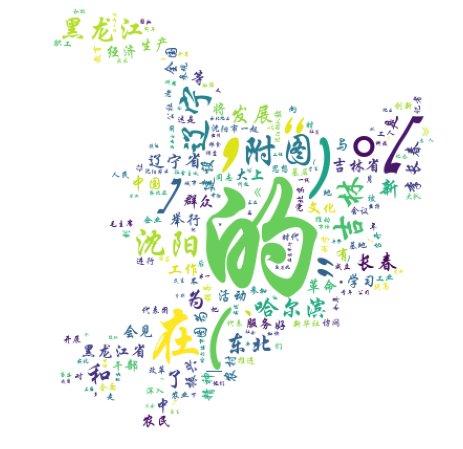

In [40]:
pic = Image.open('background1.png')
plt.figure(figsize=(16, 8))
w = WordCloud(font_path=r'C:\Windows\Fonts\STXINGKA.TTF', background_color='white', mask=np.array(pic))
w.generate_from_frequencies(res)
plt.imshow(w)
plt.axis('off')
plt.show()

In [1]:
import jieba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


from collections import Counter


with open('stopwords.txt', encoding='utf-8') as f:
    stop_words = set(f.read().split('\n'))
    
add_words = ['附图', '李长春', u'\u3000', 
            '沈阳', '辽宁', '哈尔滨', '东北', '长春', '黑龙江', '辽宁省', '吉林', '黑龙江省', '吉林省', '沈阳市', '图为', '中', '时', '月']
for i in add_words:
    stop_words.add(i)


df = pd.read_pickle('clean_data/content.pkl')
df = pd.DataFrame(df, columns=['date', 'content'])
df = df[df['date'].apply(lambda x: len(x) == 10)].reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda x: x.year)
df['words'] = df['content'].apply(lambda x: [t for t in jieba.cut(x) if t not in stop_words])

start = 2003
end = 2023

pdf = df[(df['year'] > start) & (df['year'] < end)].copy()

res_list = []
for i in pdf['words']:
    res_list.extend(i)

res_dic = Counter(res_list)
pic = Image.open('background1.png')
pic = np.array(pic)
# wd = WordCloud(font_path=r'C:\Windows\Fonts\STXINGKA.TTF', background_color='white', mask=pic, random_state=42)
# wd.generate_from_frequencies(res_dic)
# plt.figure(figsize=(16, 8))
# plt.imshow(wd)
# plt.title('{}-{}'.format(start, end))
# plt.axis('off')
# plt.show()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\STUDYH~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.613 seconds.
Prefix dict has been built succesfully.


In [4]:
tdf_n = df[df['content'].str.contains('农村')].groupby('year').count()['content']
tdf_n = pd.DataFrame(tdf_n).reset_index()
tdf_n.columns = ['年份', '农村']
tdf_c = df[df['content'].str.contains('城市')].groupby('year').count()['content']
tdf_c = pd.DataFrame(tdf_c).reset_index()
tdf_c.columns = ['年份', '城市']
tdf = pd.merge(tdf_n, tdf_c, on='年份')

In [7]:
tdf.columns = ['year', 'village', 'city']

In [9]:
sns.set_style('whitegrid')

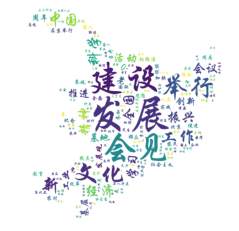

In [3]:
import jieba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

from collections import Counter

with open('stopwords.txt', encoding='utf-8') as f:
    stop_words = set(f.read().split('\n'))
    
add_words = ['附图', '李长春', u'\u3000', 
            '沈阳', '辽宁', '哈尔滨', '东北', '长春', '黑龙江', '辽宁省', '吉林', '黑龙江省', '吉林省', '沈阳市']
for i in add_words:
    stop_words.add(i)


df = pd.read_pickle('clean_data/content.pkl')
df = pd.DataFrame(df, columns=['date', 'content'])
df = df[df['date'].apply(lambda x: len(x) == 10)].reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda x: x.year)
df['words'] = df['content'].apply(lambda x: [t for t in jieba.cut(x) if t not in stop_words])

start = 2000
end = 2013

pdf = df[(df['year'] > start) & (df['year'] < end)].copy()

res_list = []
for i in pdf['words']:
    res_list.extend(i)

res_dic = Counter(res_list)
pic = Image.open('background1.png')
pic = np.array(pic)
wd = WordCloud(font_path='C:\Windows\Fonts\STXINGKA.TTF', background_color='white', mask=pic)
wd.generate_from_frequencies(res_dic)
plt.imshow(wd)
plt.axis('off')
plt.show()

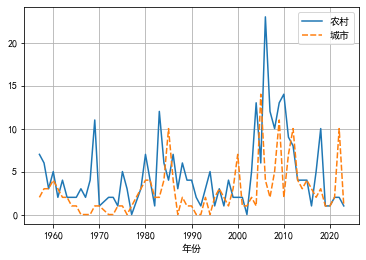

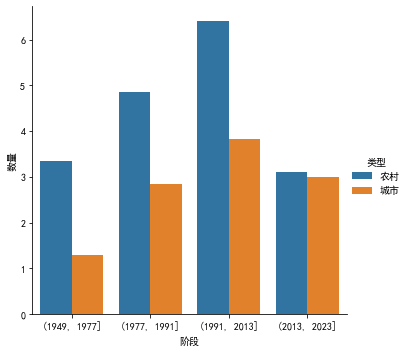

In [4]:
tdf_n = df[df['content'].str.contains('农村')].groupby('year').count()['content']
tdf_n = pd.DataFrame(tdf_n).reset_index()
tdf_n.columns = ['年份', '农村']

tdf_c = df[df['content'].str.contains('城市')].groupby('year').count()['content']
tdf_c = pd.DataFrame(tdf_c).reset_index()
tdf_c.columns = ['年份', '城市']

tdf = pd.merge(tdf_n, tdf_c, on='年份', how='outer')
tdf = tdf.fillna(0)
plt.grid()
sns.lineplot(data=tdf.set_index('年份'))
tdf['阶段'] = pd.cut(tdf['年份'], bins=[1949, 1977, 1991, 2013, 2023])
ntdf = pd.melt(tdf, id_vars=['年份', '阶段'],var_name='类型', value_name='数量')
sns.catplot(data=ntdf, kind='bar', x='阶段', y='数量', hue='类型', ci=None)
plt.show()

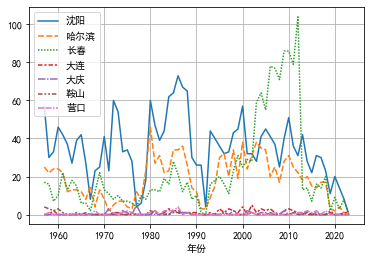

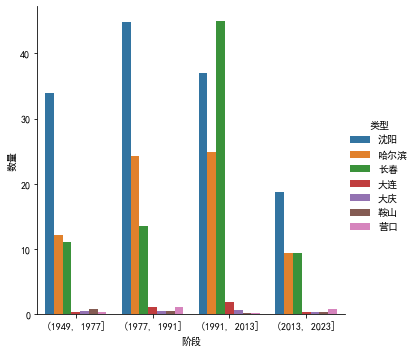

In [5]:
key_words = ['沈阳', '哈尔滨', '长春', '大连', '大庆', '鞍山', '营口']
kdf = [0 for i in range(len(key_words))]
for i in range(len(key_words)):
    kdf[i] = df[df['content'].str.contains(key_words[i])].groupby('year').count()['content']
    kdf[i] = pd.DataFrame(kdf[i]).reset_index()
    kdf[i].columns = ['年份', key_words[i]]

for i in range(1, len(key_words)):
    kdf[0] = pd.merge(kdf[0], kdf[i], on='年份', how='outer')

kdf = kdf[0].fillna(0)
plt.grid()
sns.lineplot(data=kdf.set_index('年份'))
kdf['阶段'] = pd.cut(kdf['年份'], bins=[1949, 1977, 1991, 2013, 2023])
ntdf = pd.melt(kdf, id_vars=['年份', '阶段'],var_name='类型', value_name='数量')
sns.catplot(data=ntdf, kind='bar', x='阶段', y='数量', hue='类型', ci=None)
plt.show()